## TRABAJO 3 - SEGMENTACIÓN DE CLIENTES

### SONIA GARCÍA LORENZANA Y CRISTINA ACÍN COELLO DE PORTUGAL

Una empresa de tarjetas de crédito ha monitorizado los movimientos realizados por algunos de sus clientes durante los últimos 6 meses. 
Esta información la ha resumido y la ha agregado a un fichero de datos con el fin de encontrar patrones en dichos clientes.

Esta empresa os pide:

* Realizar un análisis exploratorio de los datos detallando aquellos aspectos más relevantes que hayáis encontrado.
* Montar un modelo de clustering para segmentar los clientes en función de su comportamiento de compras.
* Desarrollar un cuadro de mando con dash donde podamos observar los aspectos más relevantes que hayáis obtenido en el descriptivo y pueda agrupar nuevos clientes en un cluster determinado.

¿Qué recomendaciones le haríais a la empresa para mantener o mejorar la experiencia del cliente?

In [270]:
#Importamos todas las librerías necesarias
import numpy as np
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [271]:
#Obtenemos el fichero de datos de nuestro trabajo (3)
trabajo3 = pd.read_csv("../../Trabajo 3 Info/trabajo3.csv")
trabajo3.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [272]:
trabajo3.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [273]:
#Vemos que hay algunas columnas que contienen NAs
trabajo3["MINIMUM_PAYMENTS"].count()

8637

In [274]:
trabajo3["CREDIT_LIMIT"].count()

8949

In [275]:
trabajo3.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [276]:
#Es por ello que para trabajar mejor directamente eliminamos las filas que contengan algún NA
df=trabajo3.dropna()
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

In [277]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [278]:
df.count()

CUST_ID                             8636
BALANCE                             8636
BALANCE_FREQUENCY                   8636
PURCHASES                           8636
ONEOFF_PURCHASES                    8636
INSTALLMENTS_PURCHASES              8636
CASH_ADVANCE                        8636
PURCHASES_FREQUENCY                 8636
ONEOFF_PURCHASES_FREQUENCY          8636
PURCHASES_INSTALLMENTS_FREQUENCY    8636
CASH_ADVANCE_FREQUENCY              8636
CASH_ADVANCE_TRX                    8636
PURCHASES_TRX                       8636
CREDIT_LIMIT                        8636
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                    8636
TENURE                              8636
dtype: int64

In [279]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# **ANÁLISIS EXPLORATORIO**

En primer lugar vamos a comprobar si los clientes están repetidos en el dataset (CUST_ID) o sin embargo cada fila representa a una persona. 

In [280]:
df["CUST_ID"].unique()

array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)

In [281]:
df.groupby('CUST_ID').mean().count()

BALANCE                             8636
BALANCE_FREQUENCY                   8636
PURCHASES                           8636
ONEOFF_PURCHASES                    8636
INSTALLMENTS_PURCHASES              8636
CASH_ADVANCE                        8636
PURCHASES_FREQUENCY                 8636
ONEOFF_PURCHASES_FREQUENCY          8636
PURCHASES_INSTALLMENTS_FREQUENCY    8636
CASH_ADVANCE_FREQUENCY              8636
CASH_ADVANCE_TRX                    8636
PURCHASES_TRX                       8636
CREDIT_LIMIT                        8636
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                    8636
TENURE                              8636
dtype: int64

Comprobamos que cada fila corresponde a un único cliente, no están repetidos. En total hay 8636 clientes.

**MATRIZ DE CORRELACIÓN**

Realizamos una matriz de correlación entre todas las variables del dataset.

In [282]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

Según la información que obtenemos de la matriz de correlación: 
PURCHASES y ONEOFF_PURCHASES tienen una muy alta correlación directa (0,9168).
PURCHASES_FREQUENCY y PURCHASES_INSTALLMENTS_FREQUENCY tienen una alta correlación directa (0,8623).
CASH_ADVANCE_FREQUENCY y CASH_ADVANCE_TRX tienen una alta correlación directa (0,7996).

En general, no hay una alta correlación entre las variables.

**Distribución de la variable BALANCE**

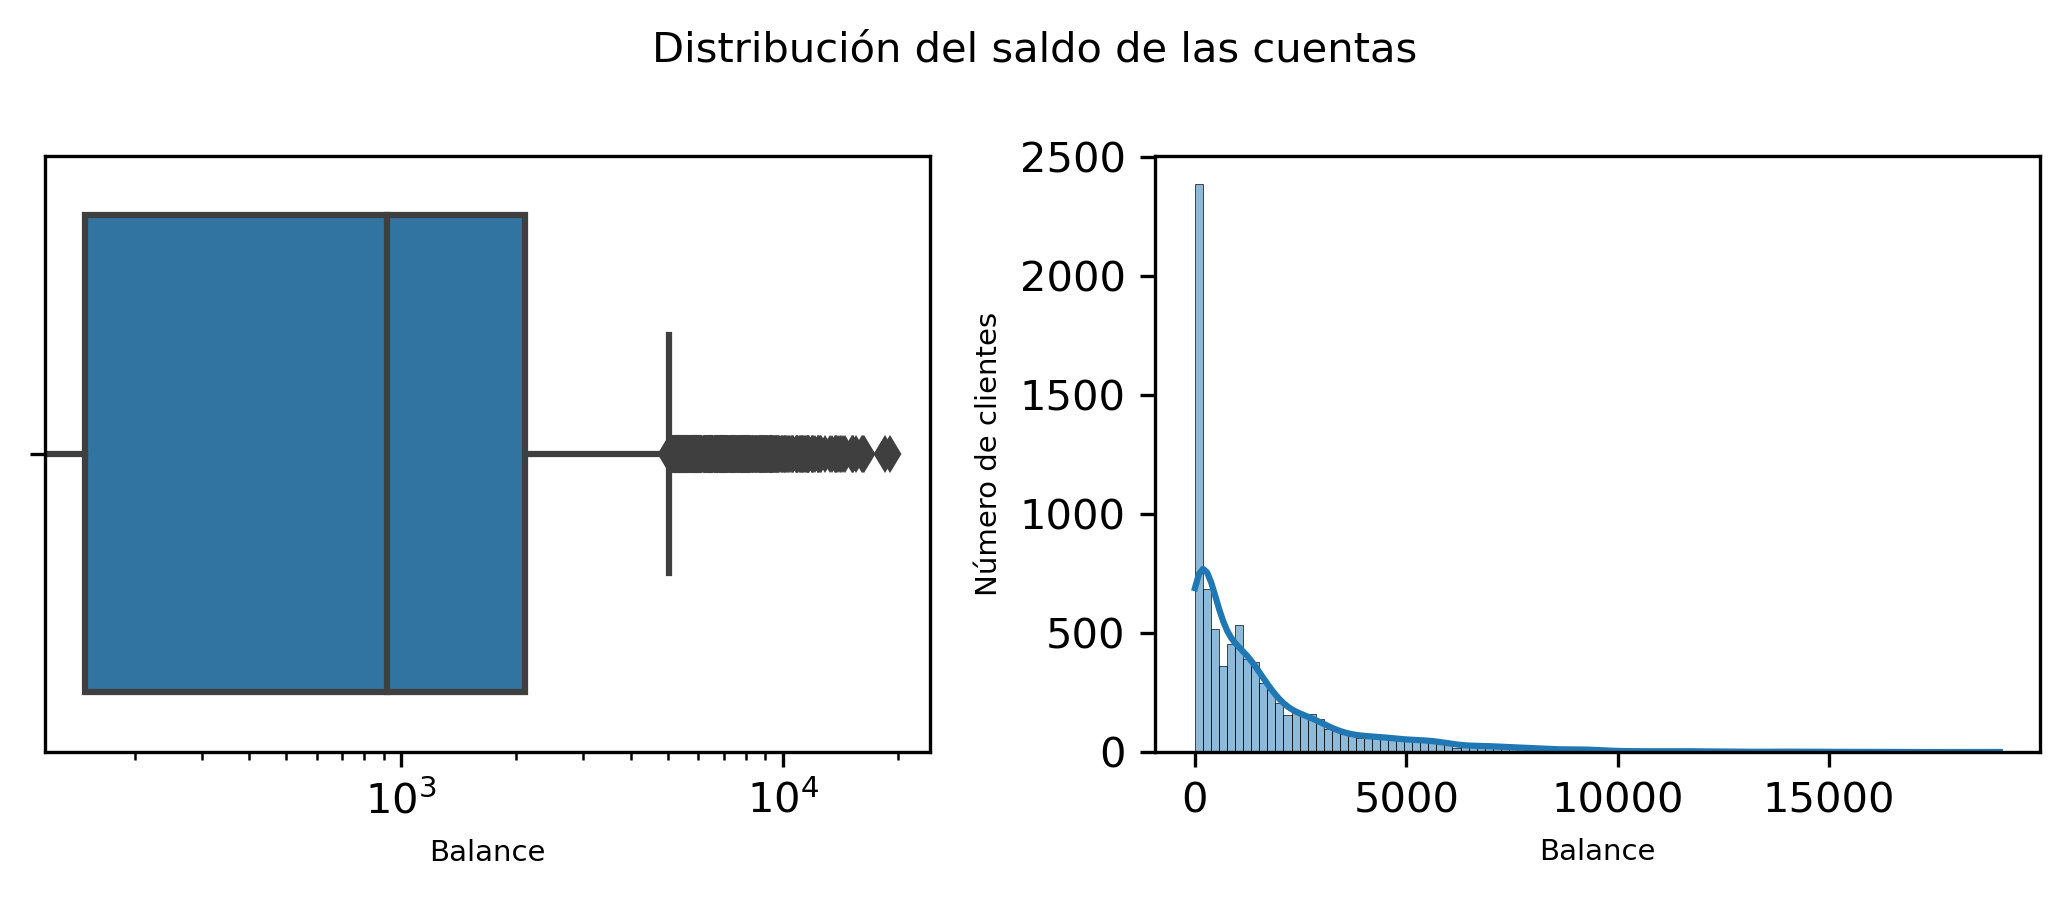

In [283]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3), dpi=300)
fig.suptitle('Distribución del saldo de las cuentas', size=10)

sns.boxplot(ax=axes[0],x=df["BALANCE"])
axes[0].set_xlabel('Balance', size=7)

#Aplicamos una escala logarítmica para una mejor visualización de los datos
axes[0].set(xscale='log')

sns.histplot(ax=axes[1],  x=df["BALANCE"],  palette='turbo', kde=True)
axes[1].set_xlabel('Balance', size=7)
axes[1].set_ylabel('Número de clientes', size=7)

fig.tight_layout()
plt.show()

En la gráfica anterior comprobamos que los clientes de esta empresa de tarjetas de crédito no tienen, generalmente, mucho dinero en la cuenta. Esto quiere decir que esta empresa no está focalizada en clientes muy adinerados.

Con la primera gráfica comprobamos que tenemos muchos outliers (reflejado en los puntos de la derecha), pero no podemos eliminarlos porque en ese caso estaríamos perdiendo mucha información. 
Por ello, dividiremos el dataset en dos dataframes: uno con todos los outliers, que formarán un cluster y otro con el resto de clientes.

Text(0.5, 0, 'Balance')

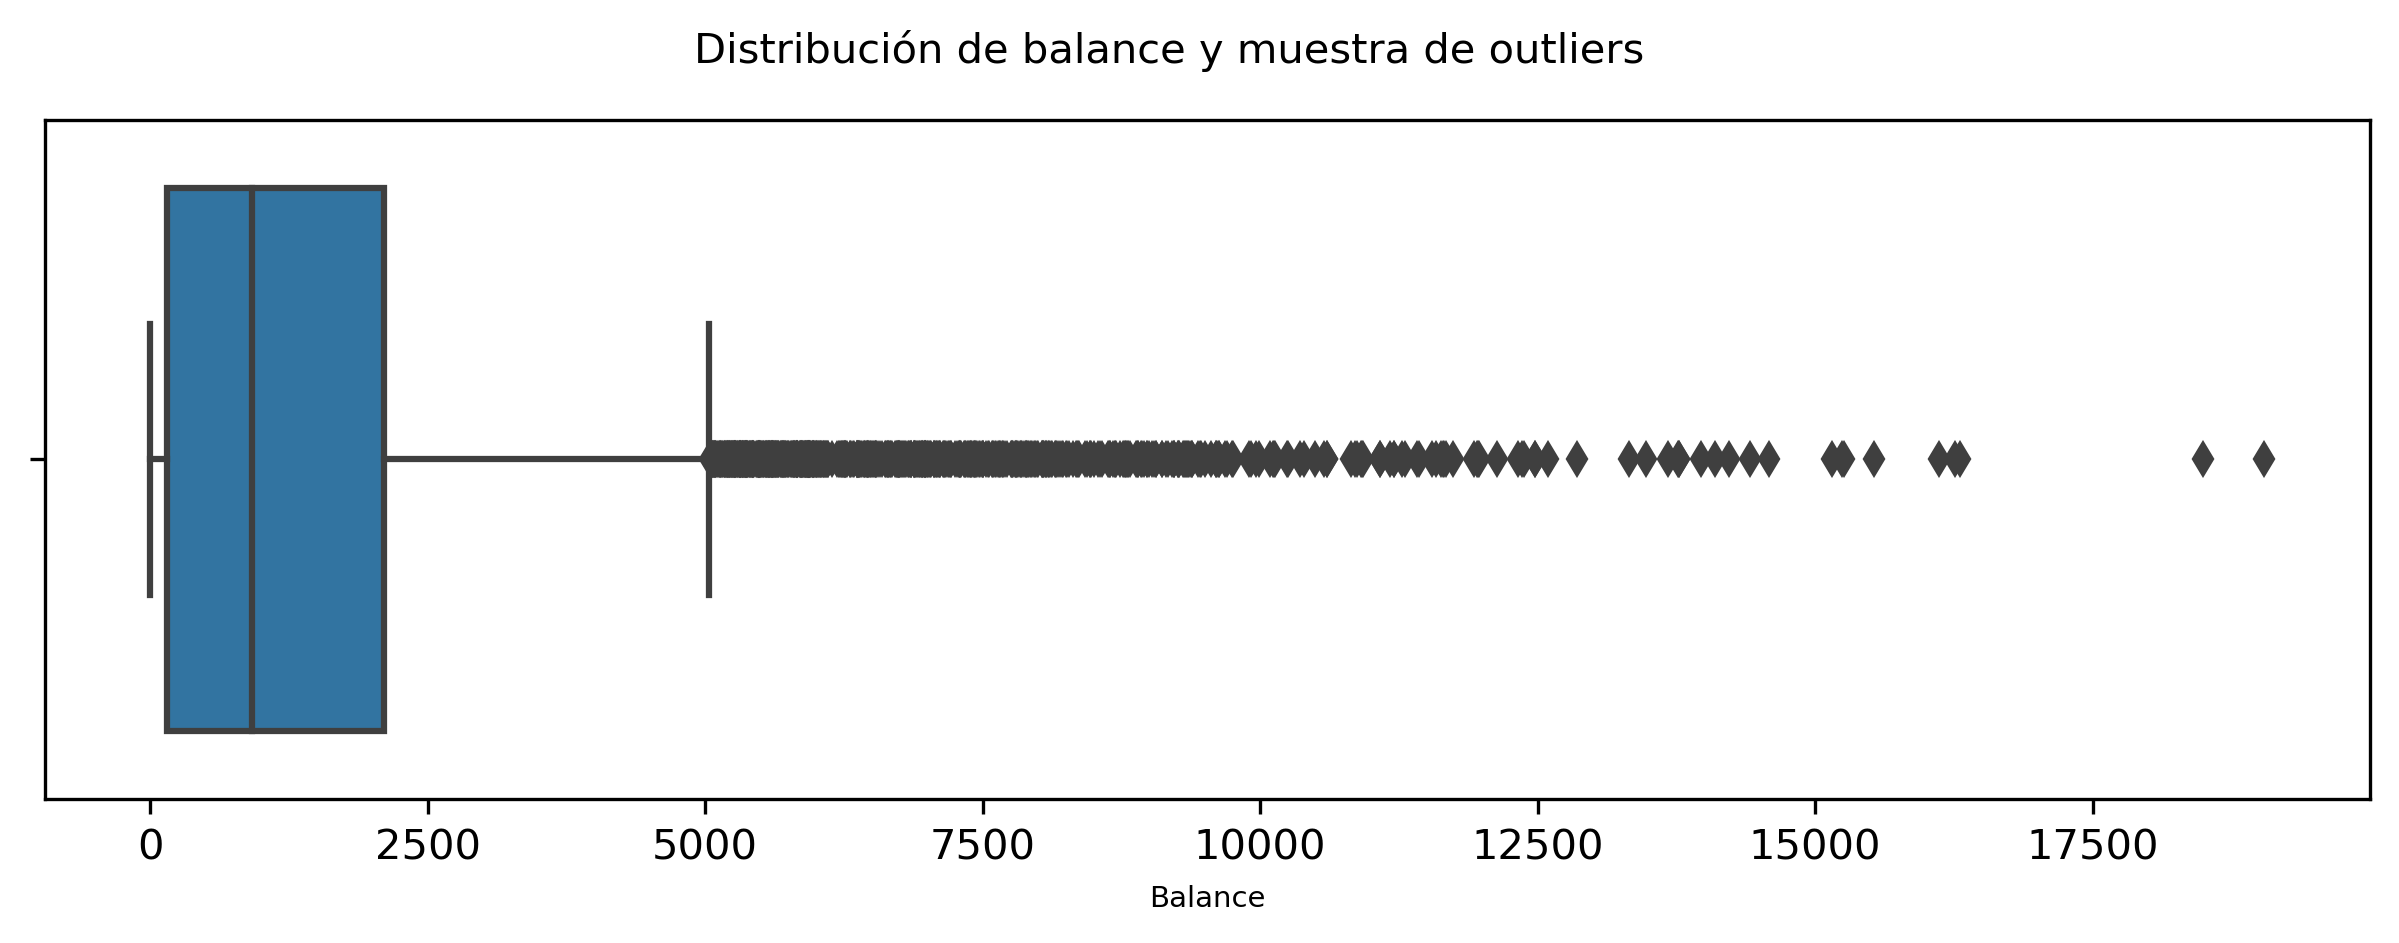

In [284]:
fig, ax = plt.subplots(figsize=(10,3), dpi=300)
fig.suptitle('Distribución de balance y muestra de outliers', size=10)

sns.boxplot(ax=ax,x=df["BALANCE"])
ax.set_xlabel('Balance', size=7)


Como se ha mostrado anteriormente, tenemos que tener en cuenta los outliers, porque nos dan mucha información. 
Por ello, para los clientes con balance menor a 5000 haremos un dataframe (que representarán 7961 clientes de los 8636 totales) y para los clientes con balance mayor o igual a 5000 (los outliers, que representarán 675 clientes de los 8636 totales), haremos otro.

In [285]:
# df total: 8636 rows
df_out = df[df.BALANCE >= 5000] # 675 rows
df_client = df[df.BALANCE < 5000] # 7961 rows

**Relación de la variable BALANCE con CREDIT_LIMIT**

In [286]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  6,  7])

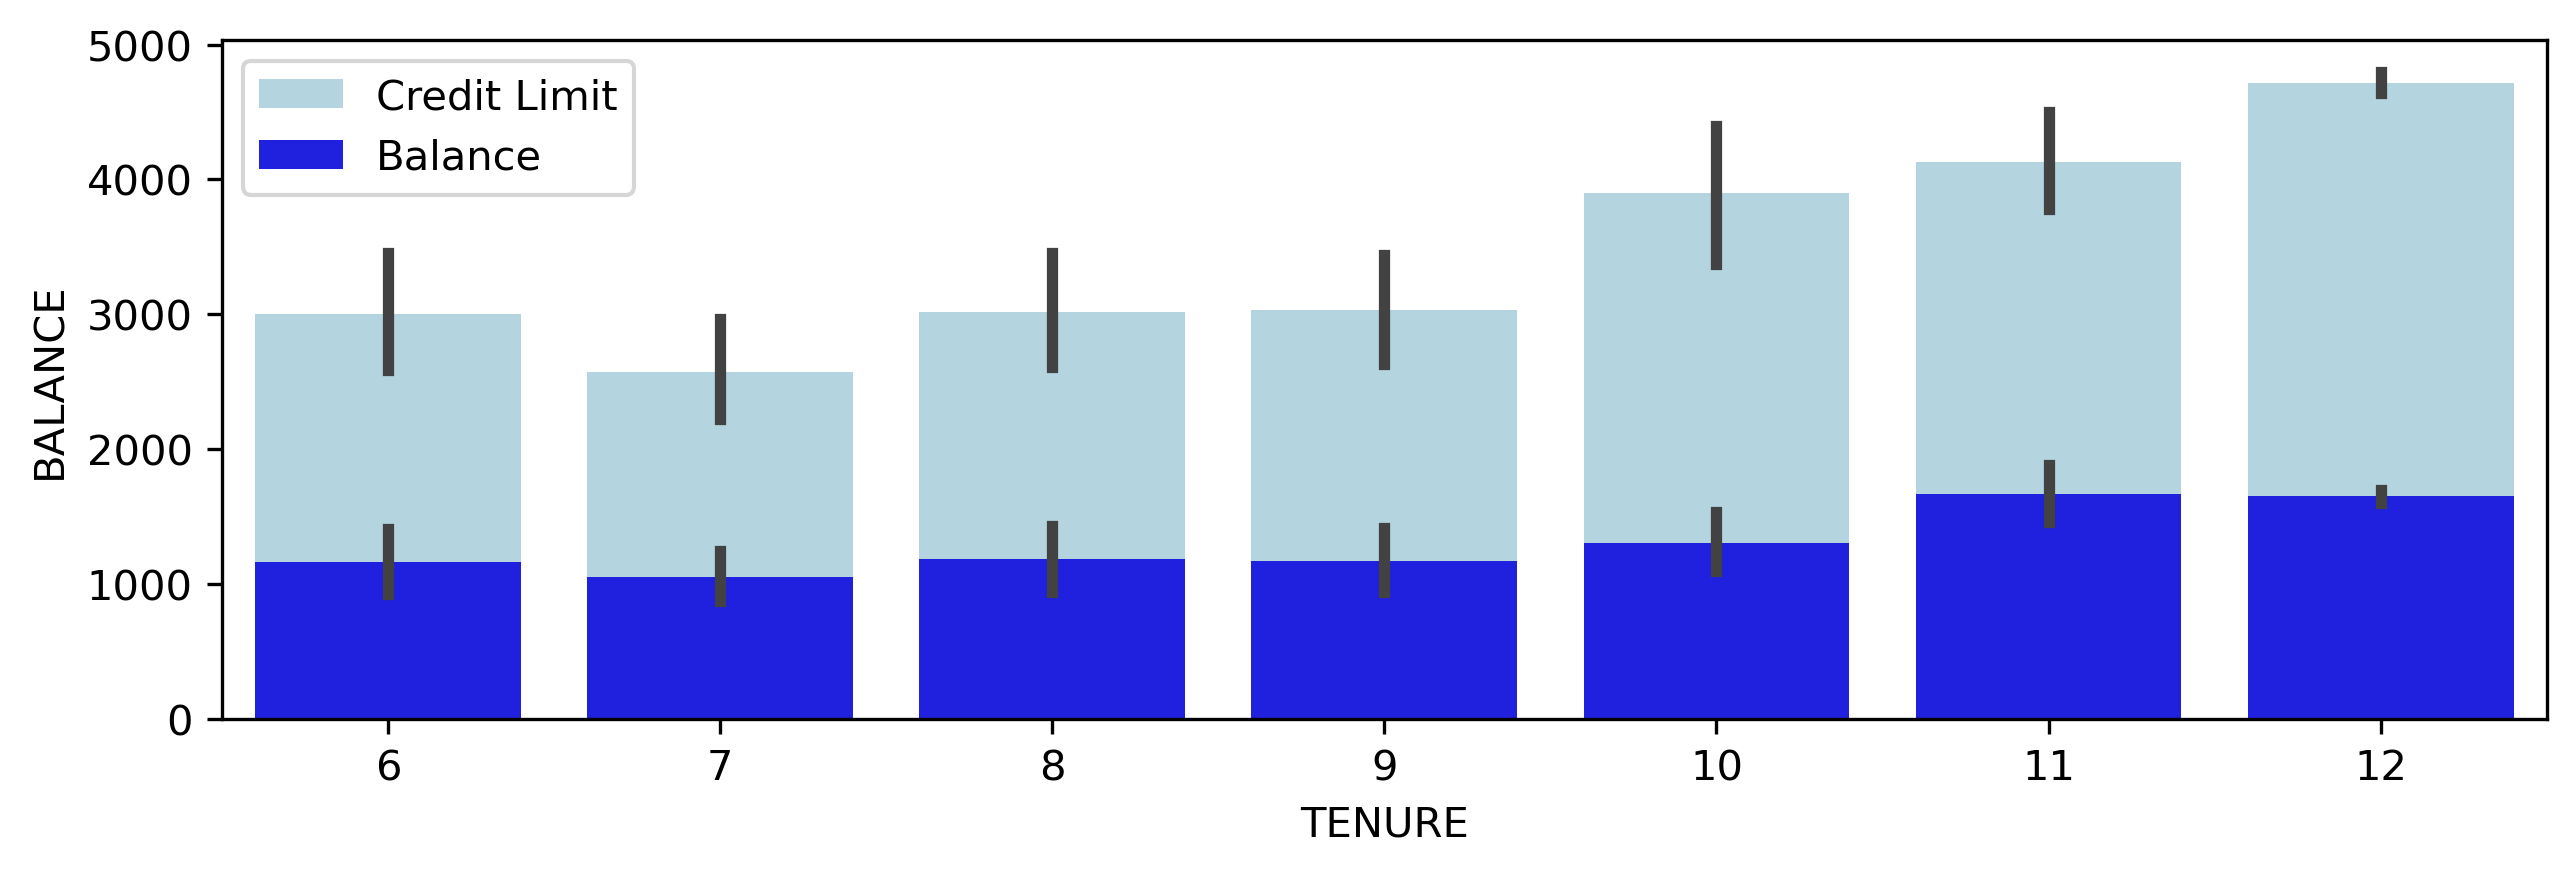

In [287]:
fig, ax = plt.subplots(figsize=(10,3), dpi=300)

sns.barplot(data=df, x='TENURE', y='CREDIT_LIMIT',label='Credit Limit', color='lightblue')
sns.barplot(data=df, x='TENURE', y='BALANCE',label='Balance', color='blue')

ax.legend()

In [288]:
df.groupby(['TENURE','CREDIT_LIMIT']).mean().reset_index()[['TENURE','CREDIT_LIMIT','BALANCE']]

TENURE  CREDIT_LIMIT       BALANCE
0         6         500.0      8.413558
1         6        1000.0    199.681482
2         6        1120.0    162.267397
3         6        1200.0    324.734918
4         6        1500.0    341.453222
..      ...           ...           ...
400      12       22000.0  18495.558550
401      12       22500.0  11547.520010
402      12       23000.0   2051.907054
403      12       25000.0    177.592802
404      12       30000.0   2980.054695

[405 rows x 3 columns]

In [289]:
fig = px.bar(df.groupby('TENURE').mean()['CREDIT_LIMIT'])
#fig = px.bar(df.groupby('TENURE').mean()['BALANCE'])
fig.show()

En la gráfica anterior comprobamos que cuanto mayor es el número de tenure (permanencia de la tarjeta de crédito), mayor es el límite de la tarjeta de crédito y mayor es el balance (saldo de la cuenta). Por tanto, como es lógico, a mayor saldo en la cuenta, mayor límite de crédito de la tarjeta. Los clientes que tienen mayor saldo serán posiblemente los uqe mayores ingresos tengan y el banco les podrá otorgar más crédito ya que no tendrán mucho riesgo de hacer default.

In [290]:
#En cuanto al análisis exploratorio, no hemos podido realizar gran variedad de gráficos ya que lo encontrábamos difícil
#por tener sólo variables numéricas. Estamos preparando un gráfico de spyder pero todavía no lo hemos acabado.

# **CLUSTERING**

Montamos un modelo de clustering para segmentar los clientes en función de su comportamiento de compras.

Este modelo de clustering pretende hacer una segmentación de clientes en función de su comportamiento con el objetivo de poder desarrollar estrategias de marketing adecuadas para cada uno de estos grupos. El dataset proporciona información de cada uno de los clientes de una empresa de tarjetas de crédito, en función del 18 varaibles explicativas. A continuación, vamos a desarrollar varios modelos de clustering.

### DATA CLEANING

Con el objetivo de limpiar nuestro dataset, en primer lugar quitamos los NAs de nuestras variables (ya lo hemos realizado anteriormente).También pondremos la variable CUST_ID como index (índice), ya que es un identificador único que servirá para identificar a cada cliente. Además, poniendo CUST_ID como index, nos permitirá trabajar con todos nuestros datos numéricos de forma más sencilla (ya que el resto de variables son numéricas)

In [291]:
df = df.set_index("CUST_ID")
df_out = df_out.set_index("CUST_ID")
df_client = df_client.set_index("CUST_ID")

Empezamos a trabajar con df_client, que será el dataframe con todos los clientes que no son outliers. El otro dataframe, mostrará un cluster de todos los outliers. Por tanto, al terminar nuestro modelo de clustering, lo añadiremos como otro grupo más. 
Por ello, para hacer el modelo, empezaremos analizando df_client.

### FEATURE SCALING

Es importante que antes de realizar el modelo de clustering, apliquemos una técnica de normalización (escalemos las variables explicativas) para evitar que el algoritmo de más peso a unas variables que a otras.

La mayoría de los modelos de clustering, incluidos los que se van a utilizar, se basan en distancias, por ello es fundamental tener todas las variables en la misma escala. 

En nuestro dataset, por ejemplo, encontramos dos variables cuyos valores toman un rango de valores muy diferente. Cualquiera de las variables de frecuencia (BALANCE_FREQUENCY), oscilan entre 0 y 1, mientras que hay otras variables como PURCHASES que presentan una diferencia entre el valor mínimo y el máximo mucho mayor.

Para normalizar utilizaremos StandardScaler().

In [292]:
#Variable PURCHASES no escalada (original)
df_client["PURCHASES"].head()

CUST_ID
C10001      95.40
C10002       0.00
C10003     773.17
C10005      16.00
C10006    1333.28
Name: PURCHASES, dtype: float64

In [293]:
#Variable PURCHASES escalada (StandardScaler)

standard_scaler=StandardScaler()
df_scaled=standard_scaler.fit_transform(df_client)
df_scaled=pd.DataFrame(df_scaled,columns=df_client.columns,index=df_client.index)

In [294]:
#Mostramos variable PURCHASES escalada
df_scaled["PURCHASES"].head()

CUST_ID
C10001   -0.452884
C10002   -0.503382
C10003   -0.094118
C10005   -0.494913
C10006    0.202366
Name: PURCHASES, dtype: float64

Comprobamos que los datos de todo el dataframe están escalados:

In [295]:
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                             
C10001  -0.903348          -0.320092  -0.452884         -0.385464   
C10002   1.734108           0.104789  -0.503382         -0.385464   
C10003   1.144046           0.529671  -0.094118          0.152689   
C10005  -0.255311           0.529671  -0.494913         -0.374327   
C10006   0.572335           0.529671   0.202366         -0.385464   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                -0.359593     -0.464992            -0.833597   
C10002                -0.473147      3.514705            -1.250763   
C10003                -0.473147     -0.464992             1.252226   
C10005                -0.473147     -0.464992            -1.042181   
C10006                 1.113845     -0.464992             0.417897   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                    -0.680532                         -0.723090   
C10002                    -0.680532                         -0.932852   
C10003                     2.680928                         -0.932852   
C10005                    -0.400411                         -0.932852   
C10006                    -0.680532                          0.535486   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                -0.649720         -0.457658      -0.534555   
C10002                 0.705306          0.206563      -0.621743   
C10003                -0.649720         -0.457658      -0.098612   
C10005                -0.649720         -0.457658      -0.578149   
C10006                -0.649720         -0.457658      -0.272989   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
CUST_ID                                                                        
C10001      -0.939803 -0.551514         -0.291115         -0.564414  0.362681  
C10002       0.920348  1.000538          0.229977          0.164225  0.362681  
C10003       1.075361 -0.384317         -0.018637         -0.564414  0.362681  
C10005      -0.877798 -0.361932         -0.232303         -0.564414  0.362681  
C10006      -0.691783 -0.074804          0.975674         -0.564414  0.362681

### APLICACIÓN DE PCA

PCA es el proceso por el cual se transforma un conjunto de variables originales en un nuevo conjunto de variables más pequeño, que son combinaciones lineales de las variables de partida. Las nuevas variables (componentes principales) se caracterizan por estar incorreladas entre sí y, además, pueden ordenarse de acuerdo con la información que llevan incorporada (una componente incorpora mayor información cuanto mayor sea su varianza). Escogeremos el número óptimo de componentes principales con la varianza explicada acumulada. 

In [296]:
pca_object=PCA()
pca_object.fit(df_scaled)

PCA()

In [297]:
pca_object.components_.shape

(17, 17)

Comprobamos que el número de variables es 17 ya que hemos cambiado la variable de identificador de clientes a nuestro nuevo index por ser un identificador único.

In [298]:
df_pca=pd.DataFrame(data=pca_object.components_,columns=df_scaled.columns,index=['PC{}'.format(i) for i in range(1,pca_object.n_components_+1)])
df_pca=df_pca.transpose()
df_pca.head()

PC1       PC2       PC3       PC4       PC5  \
BALANCE                -0.005778  0.408048 -0.259032  0.273857  0.034051   
BALANCE_FREQUENCY       0.090034  0.154192 -0.502483  0.123208 -0.330074   
PURCHASES               0.403545  0.133959  0.165913  0.086783  0.002188   
ONEOFF_PURCHASES        0.339586  0.152805  0.268217  0.206098 -0.193048   
INSTALLMENTS_PURCHASES  0.326816  0.039819 -0.085664 -0.157509  0.335396   

                             PC6       PC7       PC8       PC9      PC10  \
BALANCE                 0.046659  0.137971 -0.265992  0.045501 -0.027382   
BALANCE_FREQUENCY      -0.161984 -0.070653 -0.001189  0.665695 -0.100259   
PURCHASES               0.209238 -0.218597 -0.006272  0.102106  0.112980   
ONEOFF_PURCHASES        0.191139 -0.129934  0.144959  0.058485 -0.080681   
INSTALLMENTS_PURCHASES  0.143740 -0.269692 -0.262277  0.129581  0.392427   

                            PC11      PC12      PC13      PC14      PC15  \
BALANCE                -0.050581 -0.655884 -0.363751  0.132118  0.113595   
BALANCE_FREQUENCY      -0.010174  0.251580  0.200809  0.000052  0.056834   
PURCHASES               0.150707  0.019924 -0.117350 -0.261865 -0.029625   
ONEOFF_PURCHASES        0.462170 -0.085823 -0.026501 -0.276225 -0.036465   
INSTALLMENTS_PURCHASES -0.451978  0.191762 -0.218340 -0.116245 -0.004263   

                            PC16      PC17  
BALANCE                 0.002758  0.000065  
BALANCE_FREQUENCY      -0.010768  0.000021  
PURCHASES              -0.000541 -0.750344  
ONEOFF_PURCHASES       -0.013658  0.570790  
INSTALLMENTS_PURCHASES  0.023492  0.333439

<AxesSubplot:>

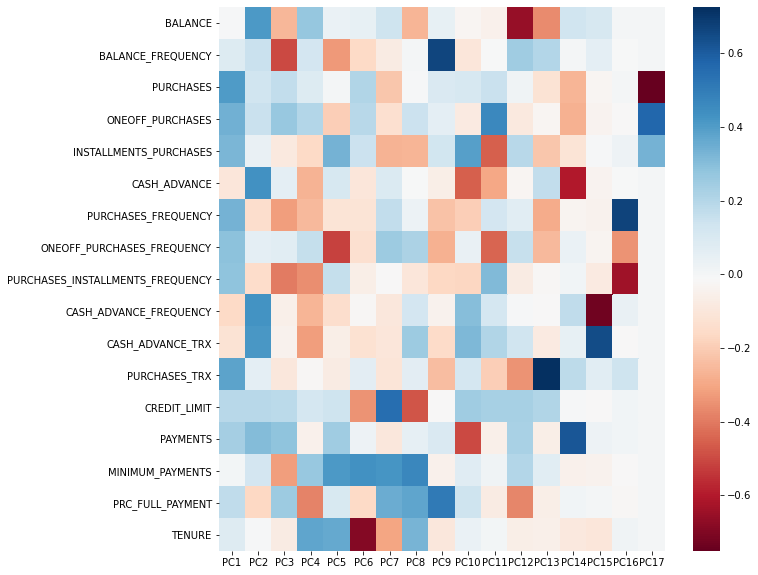

In [299]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_pca[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']],cmap='RdBu', ax=ax)

En el gráfico anterior se muestra la correlación de cada una de las variables de nuestro modelo con las 17 principales componentes, obtenidas tras aplicar PCA. El color rojo simboliza una correlación negativa, mientras que el azul hace referencia a una correlación positiva. El blanco indica que las variables están incorreladas. 

Por ejemplo, para PC9, la variable BALANCE_FREQUENCY está muy correlada, es decir, explica muy bien dicha componente principal. Por otra parte, la variable TENURE tiene una alta correlación negativa con respecto a la sexta componente principal, PC6.

Los dos gráficos que se muestran a continuación reflejan la proporción de varianza explicada para cada número de componentes principales. En el segundo gráfico se representa el ratio de la varianza explicada acumulada, es decir, será mejor cuanto mayor sea esta.  


In [300]:
ratio_varianza_explicada=pca_object.explained_variance_ratio_

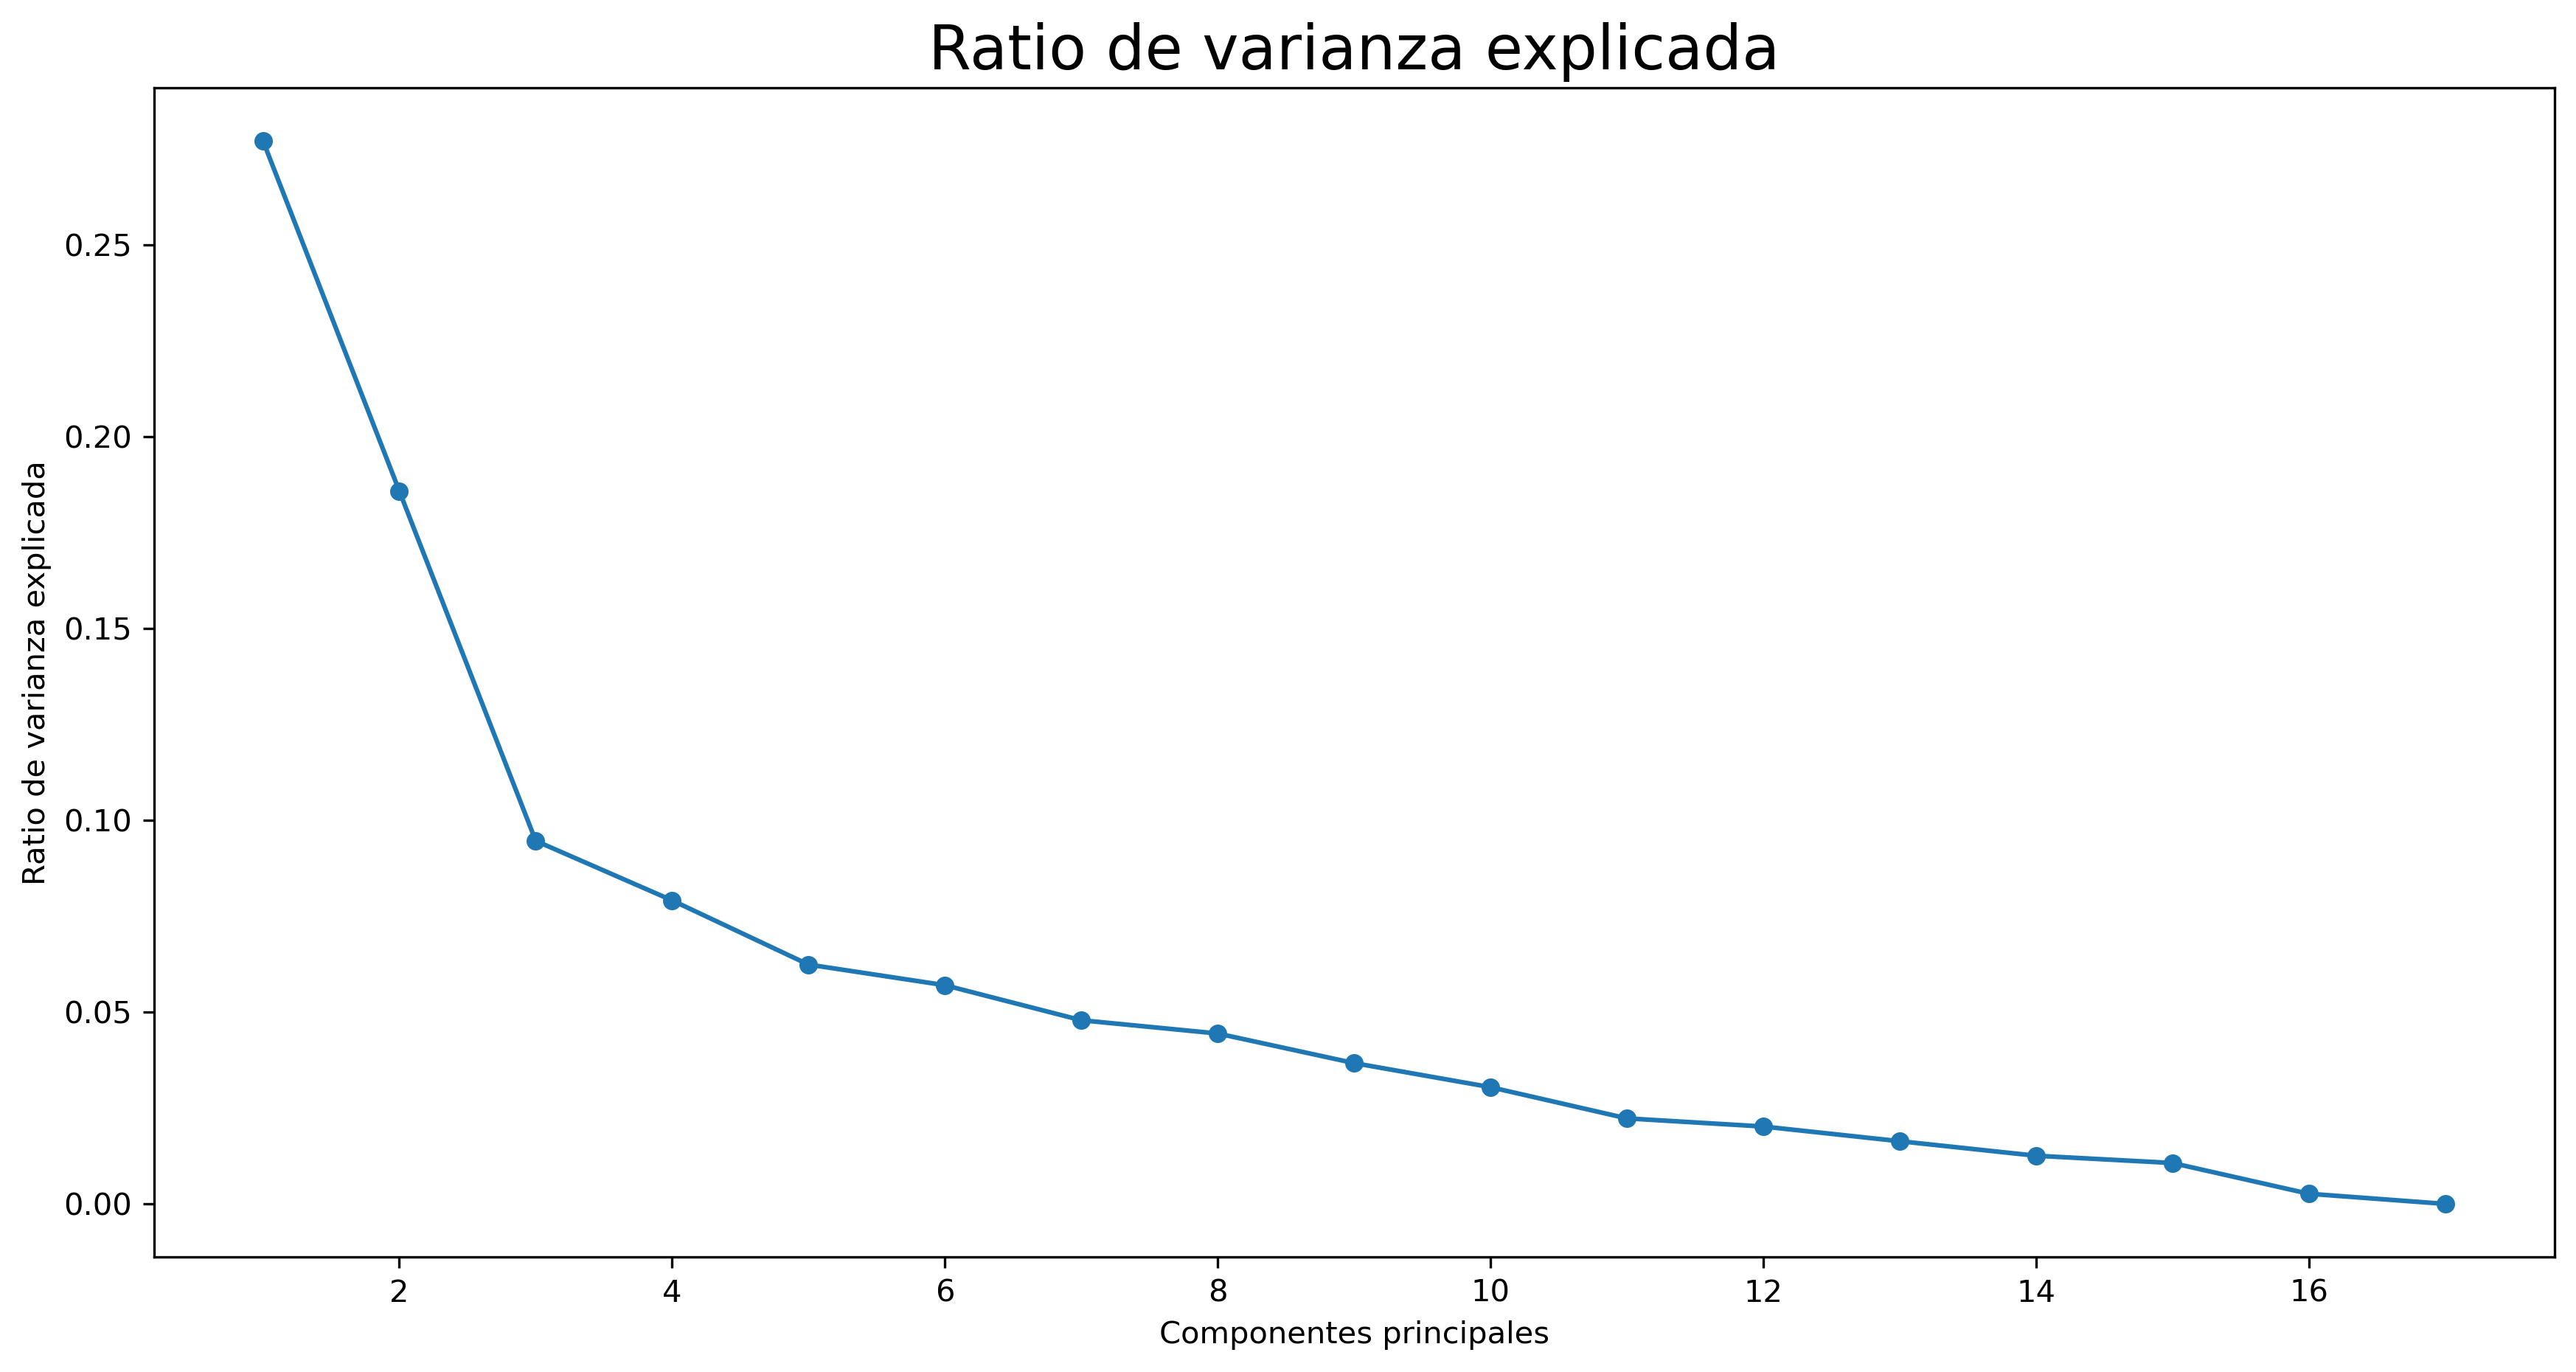

In [301]:
fig,ax=plt.subplots(figsize=(14,7),dpi=300)
ax.plot(range(1,pca_object.n_components_+1),ratio_varianza_explicada,marker='o',markersize=5);
ax.set_title("Ratio de varianza explicada", size=20);
ax.set_xlabel("Componentes principales")
ax.set_ylabel("Ratio de varianza explicada");

In [302]:
suma_acumulada=np.cumsum(pca_object.explained_variance_ratio_)

Text(0, 0.5, 'Ratio de varianza explicada acumulada')

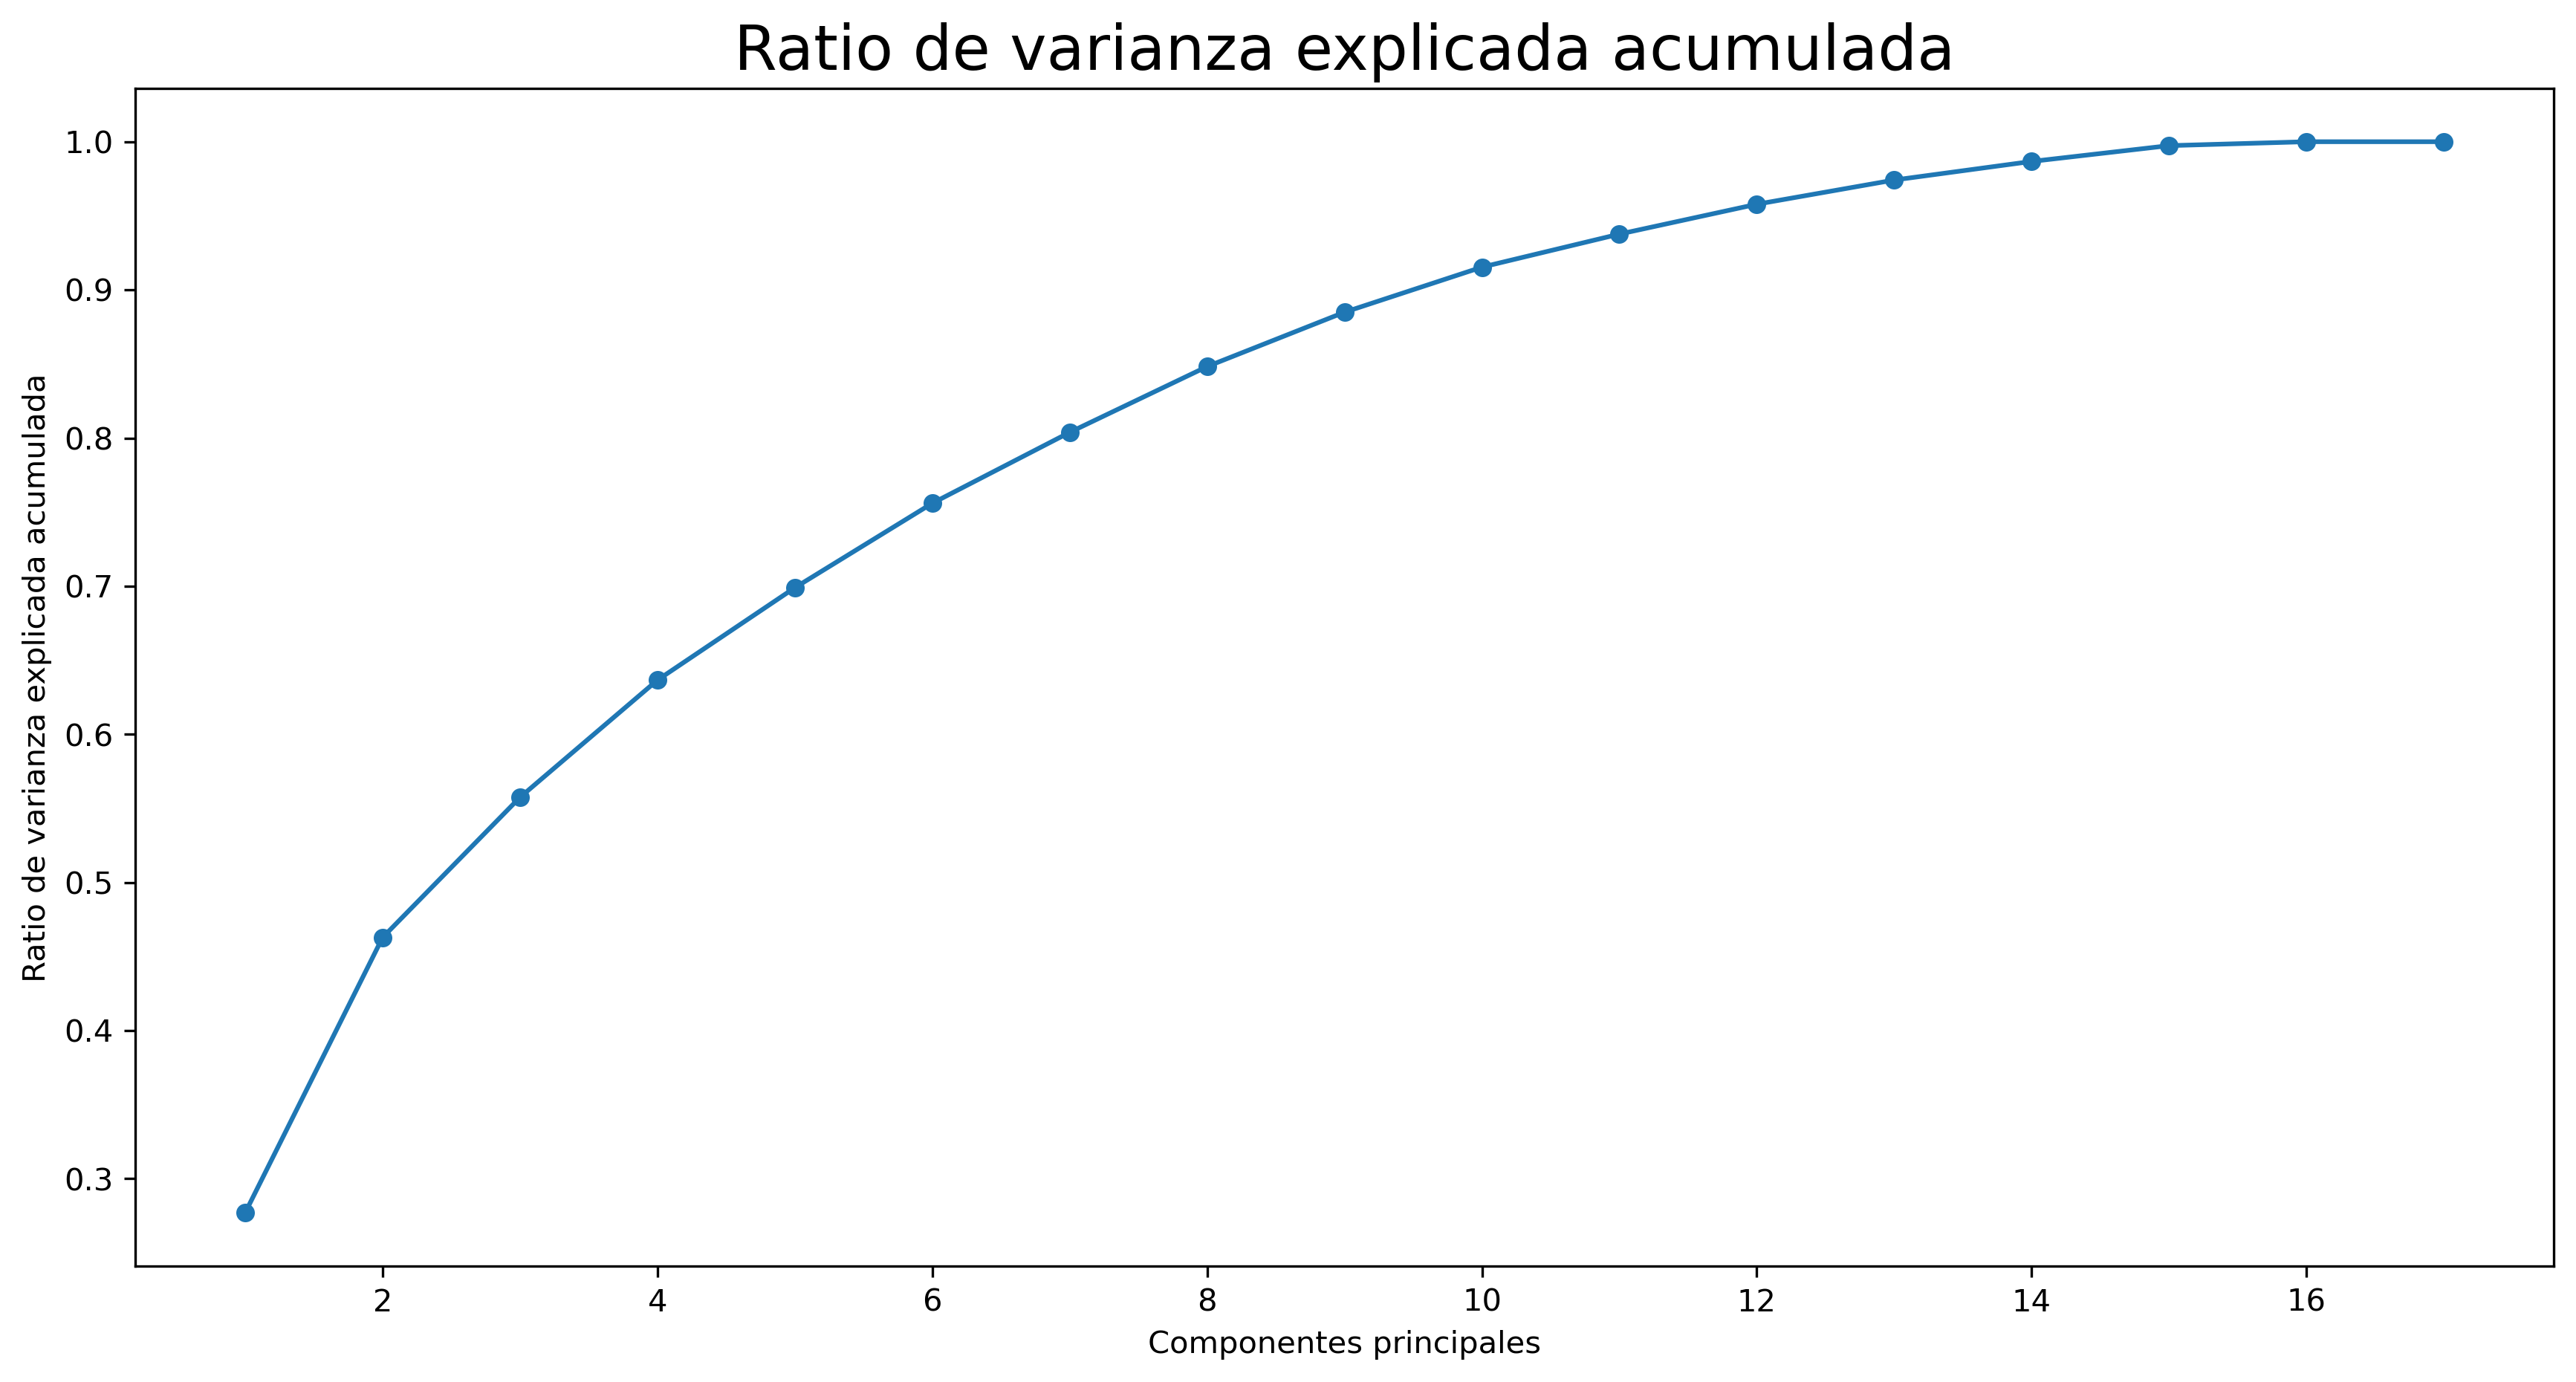

In [303]:
fig,ax=plt.subplots(figsize=(14,7),dpi=300)
ax.plot(range(1,pca_object.n_components_+1),suma_acumulada,marker='o',markersize=5);
ax.set_title("Ratio de varianza explicada acumulada", size=20);
ax.set_xlabel("Componentes principales")
ax.set_ylabel("Ratio de varianza explicada acumulada")

In [304]:
suma_acumulada

array([0.27709379, 0.46287552, 0.55749252, 0.63659292, 0.69896777,
       0.75596128, 0.80382378, 0.84823119, 0.88492631, 0.91534792,
       0.93763537, 0.95780369, 0.97414483, 0.98669629, 0.99735616,
       0.99999902, 1.        ])

Según el resultado del vector de suma_acumulada, elegimos un total de 8 componentes principales ya que explican el 84.82% de la varianza. Además, podemos observar por la gráfica que a partir de ahí prácticamente se estabiliza.

En un principio teníamos 17 variables explicativas (al eliminar los identificadores), pero al no estar las variables generalmente muy correladas, es decir, al aportar todas ellas información relevante, reducimos la dimensionalidad pero manteniendo 8 componentes principales. Con estas componentes explicamos prácticamente toda la varianza (dejando un 15% sin explicar únicamente)

### MODELOS DE CLUSTERING

Existen numerosos algoritmos de clustering. Estos se dividen en cuatro grupos fundamentales (Partitioning Clustering, Fuzzy Clustering, Hierarchical Clustering y Density-Based Clustering). 

### A) KMEANS

El primer algoritmo que vamos a utilizar es KMeans, perteneciente a Partitioning Clustering.

KMeans es una técnica que asigna cada cliente del dataset al clúster con el centroide más cercano.Como cualquier técnica de clustering, esta técnica está basada en las distancias que existen entre los atributos de entrada. Los centroides representan la media de las características de todas las observaciones pertenecientes al clúster. En un principio se predefine el número de centroides y a continuación, mediante un proceso iterativo que consiste en la lectura secuencial de los datos, cada punto se asigna al cluster con el centroide más cercano, y luego se actualiza el valor de los centroides. El proceso termina cuando se alcanza el criterio de convergencia.

El hecho de elegir el número de centroides al principio del todo puede resultar complicado, y es por ello que existen algunas técnicas que nos puede ayudar a tomar esta decisión. Entre ellas destacamos las dos más importantes: 

1. Elbow Method (método del codo). Esta técnica mide la varianza intracluster. La idea es probar un rango de valores de k, y definir cuál es el punto en el que incluir nuevos clusters no implica mejorar la medida. Se denomina método del codo por la forma que adquiere esta gráfica, siendo el número óptimo de clusters el "codo" de la misma. 

2. Silhouette (método de la silueta). Esta segunda técnica funciona de forma similar al método del codo, pero en lugar de minimizar la varianza dentro de los clústers, maximiza el coeficiente de silhoutte.

#### Pipeline

Hasta ahora hemos ido realizando paso por paso el escalado, PCA y la elección del número óptimo de clústers. Lo hemos realizado así para que se vea con mayor claridad cada uno de los pasos y así explicarlo de una manera más detallada. 

A continuación vamos a realizar todo lo anterior otra vez incluyendo el modelo de clustering con el número óptimo de clusters (3). Vamos a utilizar pipeline, para hacerlo de una manera más rápida y eficiente.

#### 1. Elbow Method (Método del codo)

In [305]:
elbow_vector=[]
slh_vector=[]
for cluster in range(2,15):
      kmeans = Pipeline([ 
        ('standard_scaler',    StandardScaler()), 
        ('pca',        PCA(n_components=8)), #El número de componentes principales elegimos que fuese 8
        ('clustering', KMeans(n_clusters=cluster,init='k-means++',n_init=7,random_state=0))
    ])

      kmeans.fit(df_client)
      clusters_labels=kmeans.predict(df_client)
      elbow_vector.append(kmeans['clustering'].inertia_)
      slh_avg=silhouette_score(df_client,clusters_labels)
      slh_vector.append(slh_avg)

El número inicial de clusters es 7, de una manera aleatoria. Con los siguientes métodos descubriremos cuál es el número óptimo y realizaremos el clustering con el mismo. 

In [306]:
elbow_vector

[92633.0716178714,
 79662.1513404386,
 69273.582922039,
 62827.23703347005,
 57599.72173367524,
 52930.31735482019,
 48282.54075570733,
 44736.97050139769,
 42139.22544223665,
 40195.09301043755,
 38577.98657275071,
 37168.991199398544,
 36097.318141080104]

Text(0, 0.5, 'Inertia')

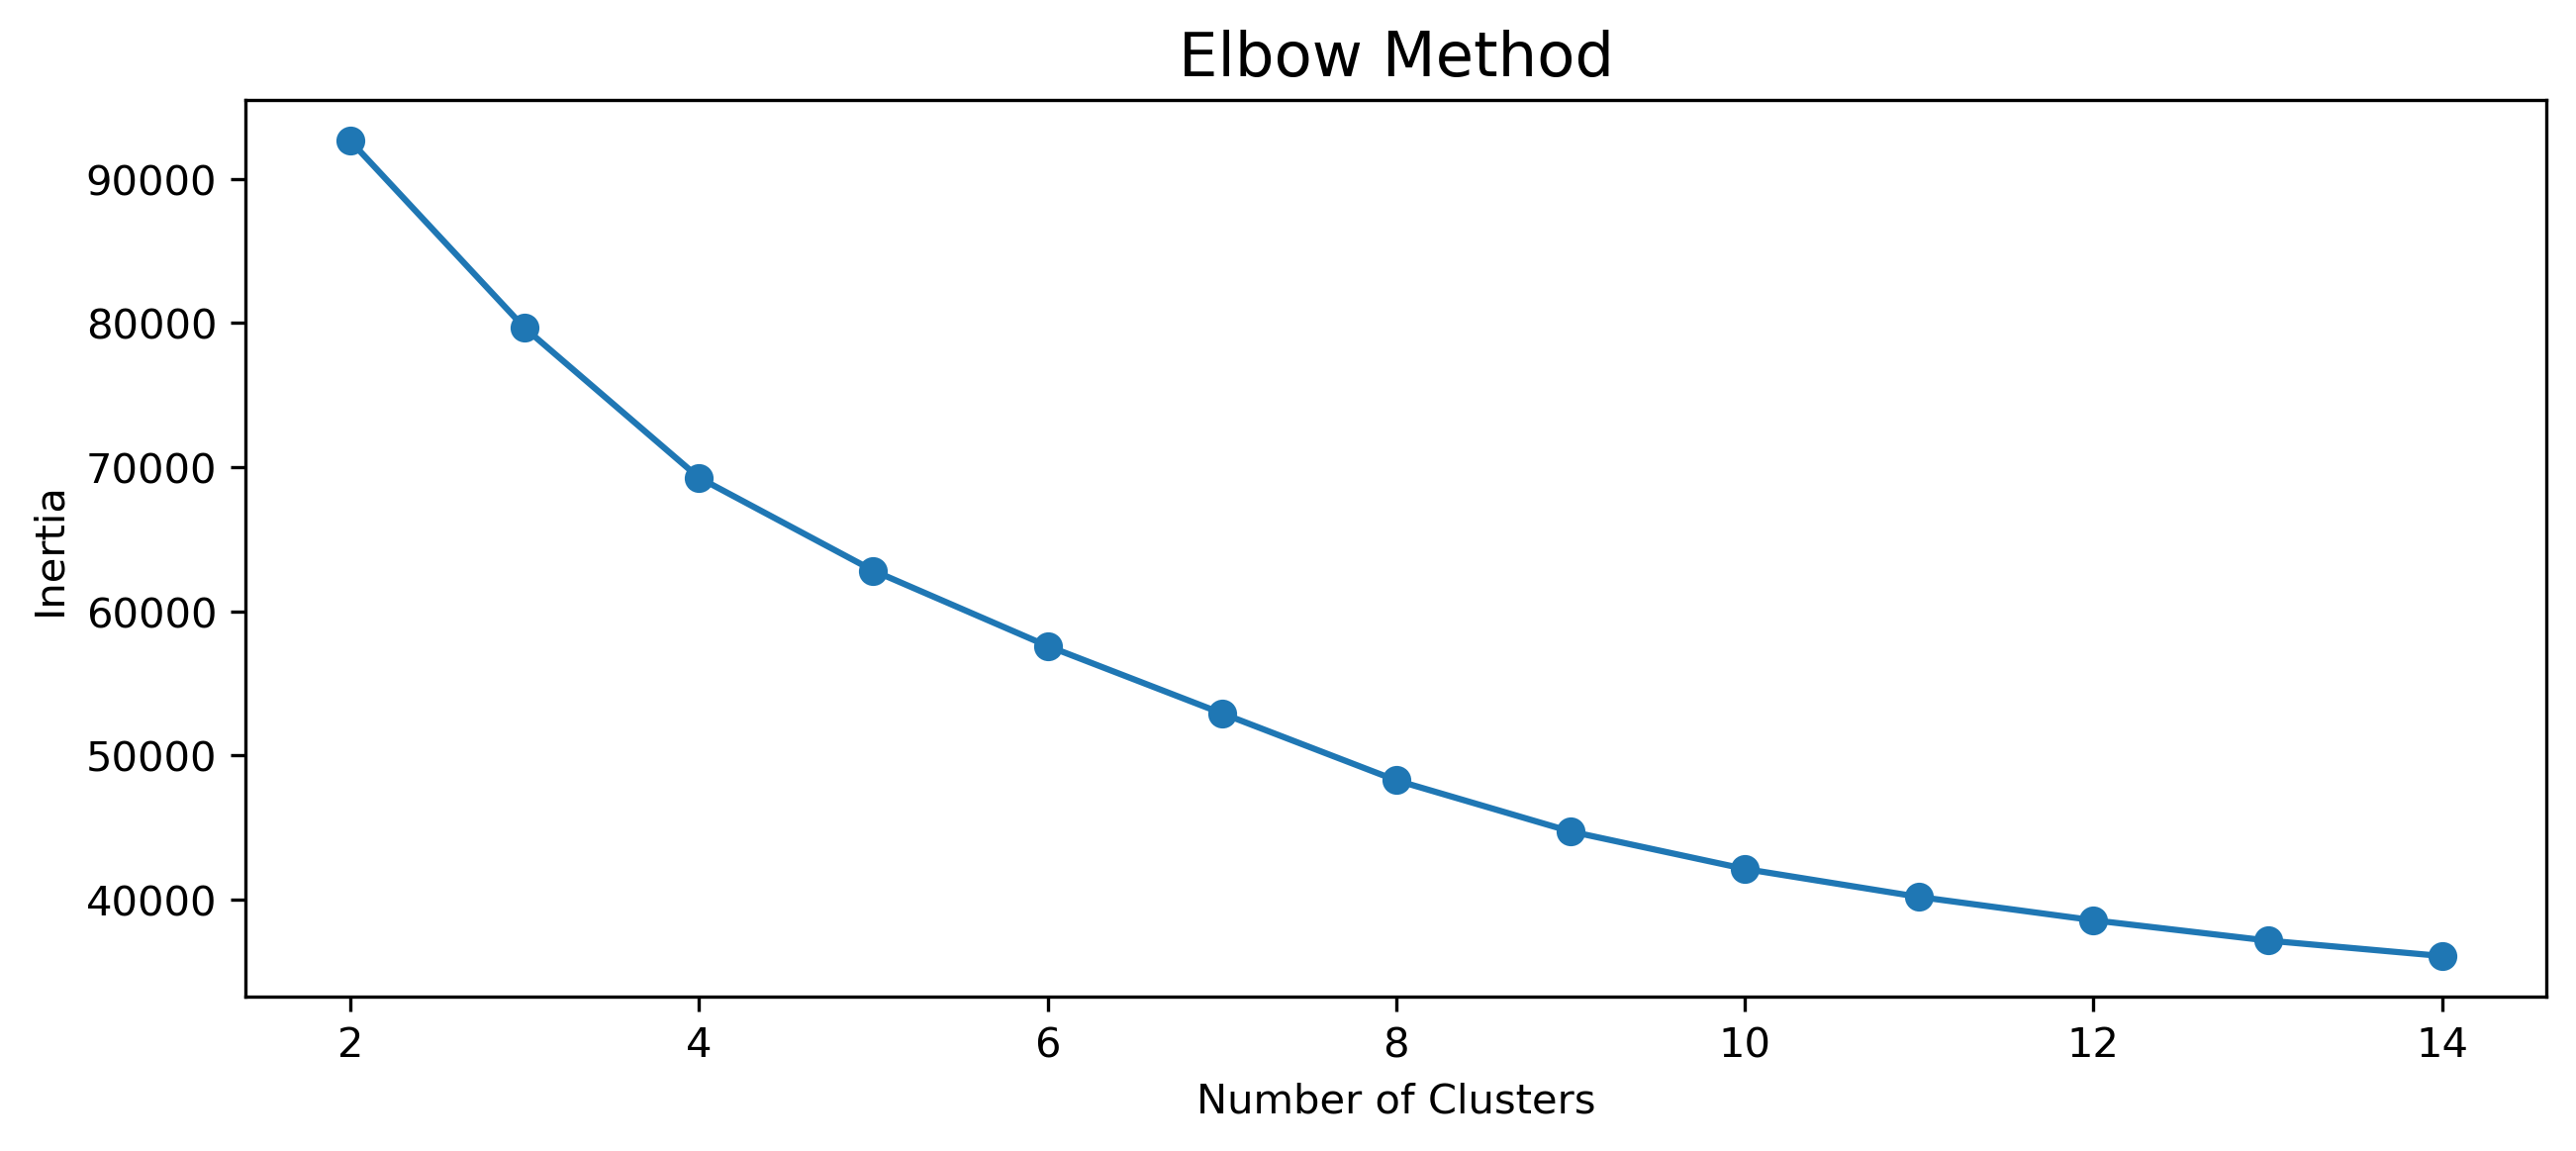

In [307]:
fig,ax=plt.subplots(figsize=(10,4), dpi=300)
ax.plot(range(2,15),elbow_vector,marker='o')
ax.set_title('Elbow Method', size=15)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')

Esta visualización nos indica que el número óptimo de clusters se encuentra en el "codo" de esta curva. Dicho esto, observamos que el codo podría corresponderse con los valores k=3,4 o incluso 5. 
Para ello, contrastamos resultados con el siguiente método.

#### 2. Silhouette Method (Método de la silueta)

Text(0, 0.5, 'Silhouette Score Avg')

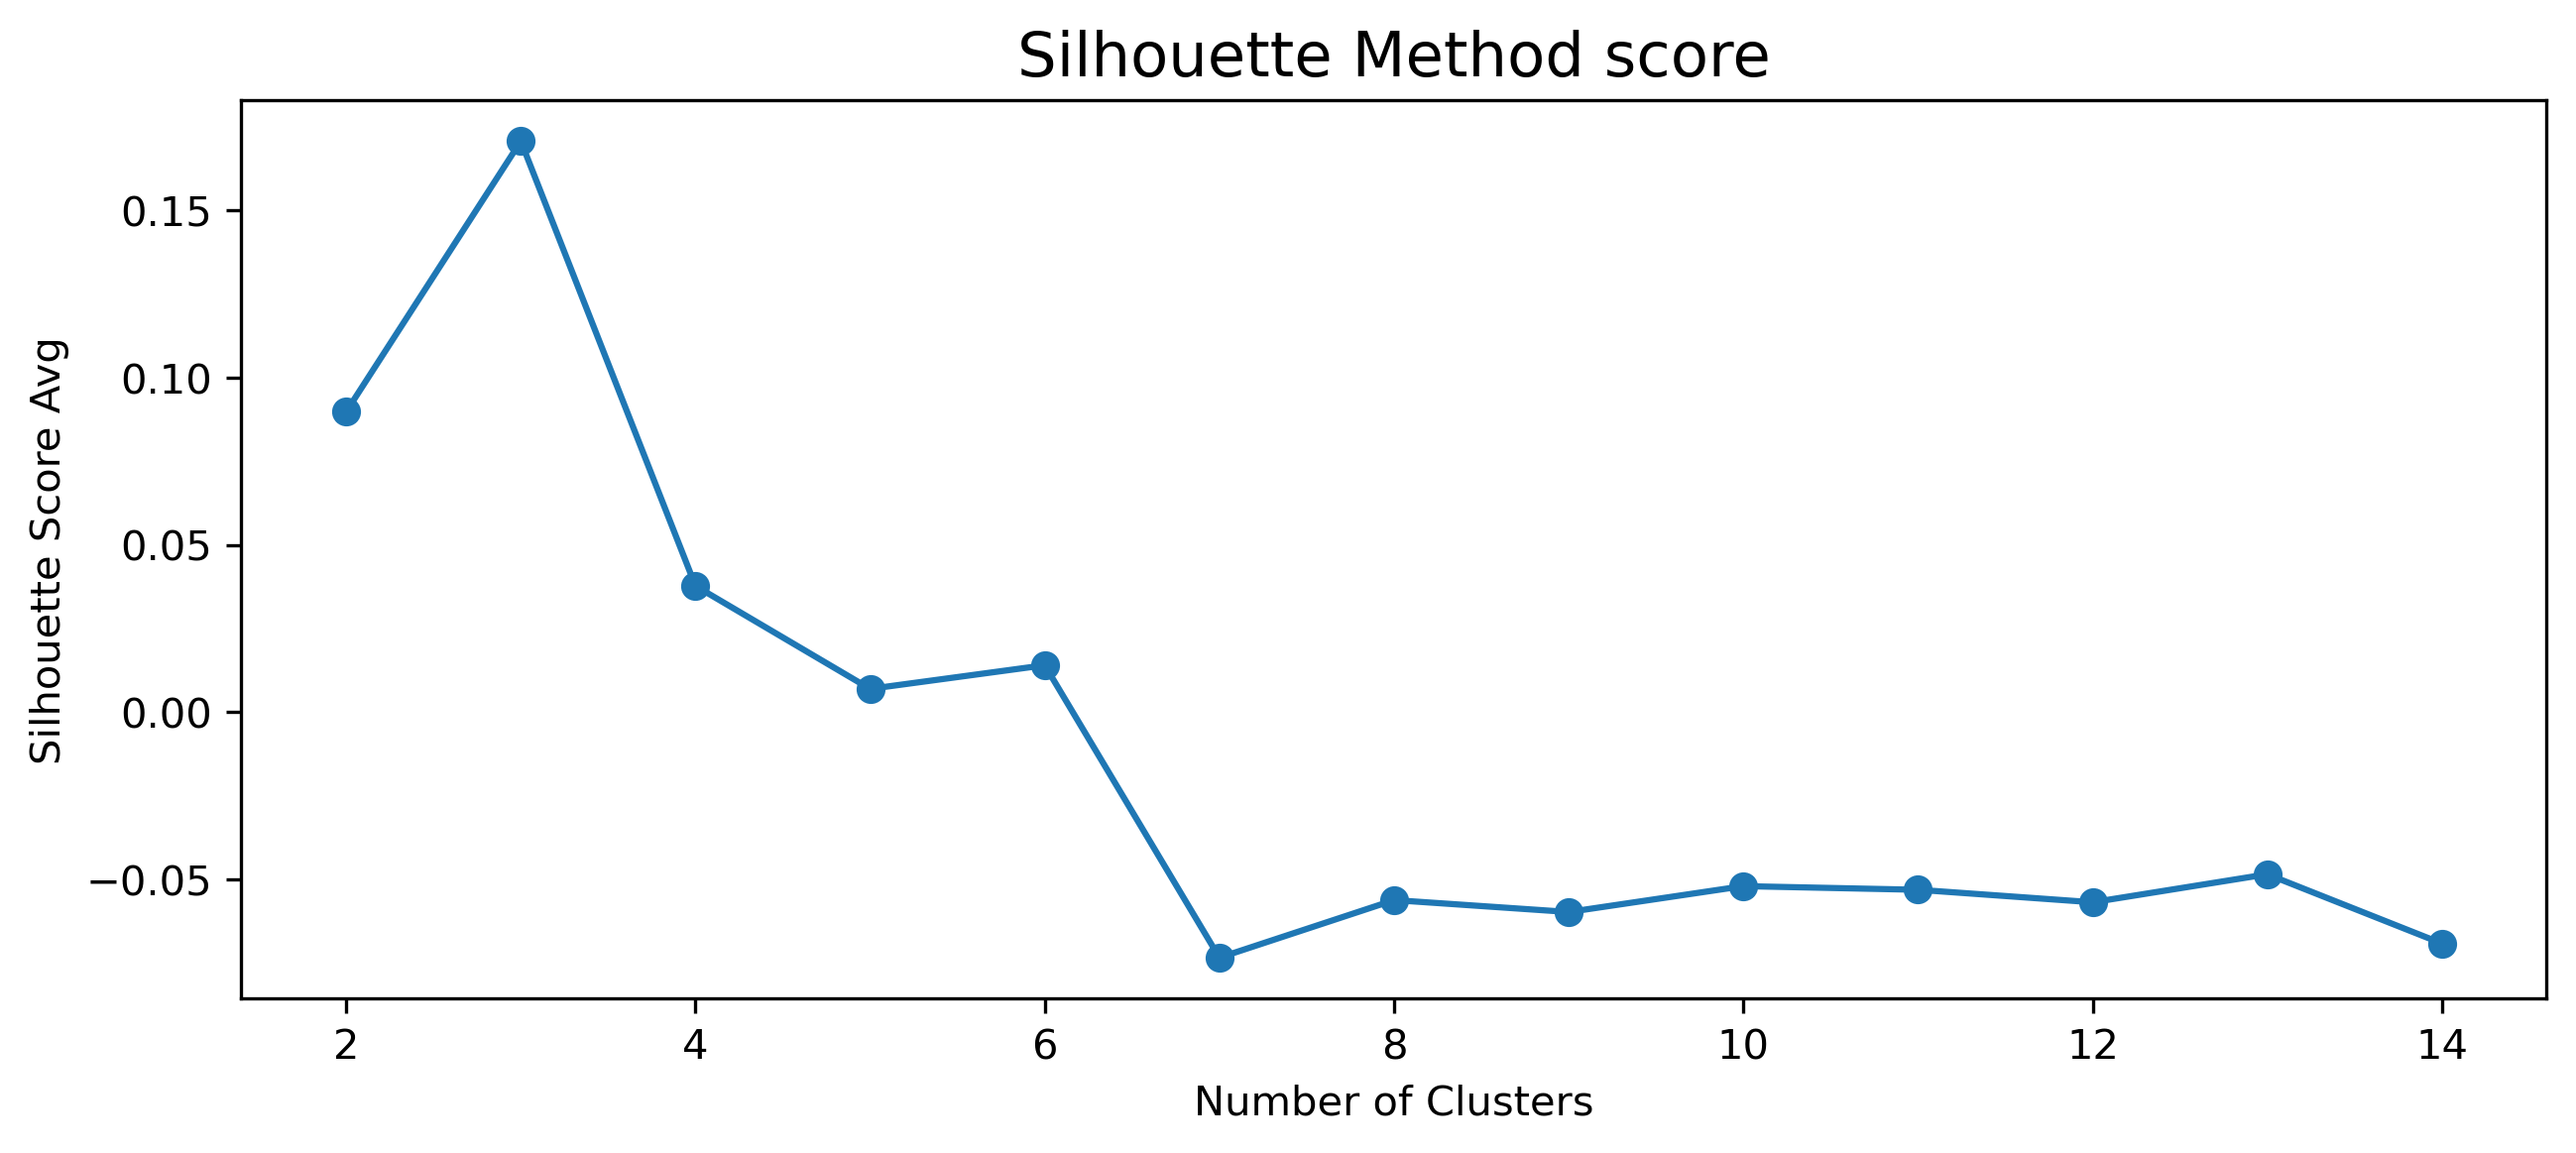

In [308]:
fig,ax=plt.subplots(figsize=(10,4), dpi=300)
ax.plot(range(2,15),slh_vector,marker='o')
ax.set_title('Silhouette Method score', size=15)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score Avg')

El método de la silueta sin embargo nos indica claramente que el número óptimo de clusters es 3, dado que tiene un mayor puntuación. Además, presenta mucha diferencia con respecto a tener 2 o 4 clusters.

In [309]:
pipe_clustering = Pipeline(
    [
        ('standard_scaler',    StandardScaler()), 
        ('pca',        PCA(n_components=8)),
        ('clustering', KMeans(n_clusters=3,init='k-means++',n_init=7, random_state=0))
    ]
)

In [310]:
df_client['cluster'] = pipe_clustering.fit_predict(df_client)

In [311]:
df_client.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10005    817.714335           1.000000      16.00             16.00   
C10006   1809.828751           1.000000    1333.28              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10005                     0.00      0.000000             0.083333   
C10006                  1333.28      0.000000             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10005                     0.083333                          0.000000   
C10006                     0.000000                          0.583333   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                     0.00                 0              2   
C10002                     0.25                 4              0   
C10003                     0.00                 0             12   
C10005                     0.00                 0              1   
C10006                     0.00                 0              8   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742        627.284787          0.000000   
C10005         1200.0   678.334763        244.791237          0.000000   
C10006         1800.0  1400.057770       2407.246035          0.000000   

         TENURE  cluster  
CUST_ID                   
C10001       12        1  
C10002       12        2  
C10003       12        1  
C10005       12        1  
C10006       12        1

Hemos incorporado una variable a nuestro dataset, nuestra variable objetivo. Esta variable toma 3 valores (0,1 o 2), según el clustering en el que haya clasficado a cada cliente nuestro modelo. 

Una vez que ya tenemos hecho el modelo de clustering utilizando KMeans comprobamos si nuestras clases están balanceadas.

In [312]:
cluster = pd.Series(data = df_client['cluster'])
cluster.value_counts()

1    4718
2    2210
0    1033
Name: cluster, dtype: int64

Las clases no están del todo balanceadas, habiendo una clase con muchos más clientes que el resto. Pero comprobamos que todas ellas tienen un número significativo de individuos.

Realizamos otro pipeline (pipe_clustering_2) con el objetivo de visualizar los clusters en función de diferentes componentes.

In [313]:
pipe_clustering_2 = Pipeline(
    [
        ('standard_scaler',   pipe_clustering['standard_scaler']), 
        ('pca',               pipe_clustering['pca'])
    ]
)

In [314]:
c = df_client.pop('cluster')

In [315]:
df_transformed = pd.DataFrame(pipe_clustering_2.transform(df_client), index=df_client.index,
             columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

df_client['cluster'] = c

#df_transformed['cluster'] = df_client.reset_index().cluster

#Reseteamos el index porque al principio habíamos eliminado los clientes que tuviesen NAs y
#se saltaba todas aquellas filas que eliminamos en su momento.

In [316]:
df_t = df_transformed
df_t['cluster'] = df_client.cluster

In [317]:
df_t

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
CUST_ID                                                                         
C10001  -1.523976 -1.362828  0.427309  0.650976  0.144631  0.121368 -0.932455   
C10002  -1.625255  3.204914  0.681991 -0.018464  1.223587 -0.802781  0.913105   
C10003   1.053594  0.158431 -0.363152  1.873358 -1.807249 -0.964967  1.539053   
C10005  -1.509179 -0.824620  0.059495  1.137661 -0.226822 -0.004028 -0.779669   
C10006   0.335180 -0.479988 -1.553041  0.560382  1.130919  0.677488 -0.538141   
...           ...       ...       ...       ...       ...       ...       ...   
C19184  -2.019828 -1.572608  1.608088 -1.076856 -1.418366  3.411616  0.618485   
C19186  -0.082285 -2.008684 -0.668220 -2.800876 -1.465017  2.531940  1.146297   
C19188  -0.684294 -1.920199 -0.212252 -2.303524 -1.387385  2.820956  0.931622   
C19189  -2.252255 -0.910895  1.056602 -1.532647 -1.649235  3.080779  0.481809   
C19190  -0.483917 -0.164086  0.978092 -1.325846 -3.111315  3.107788  0.851561   

              PC8  cluster  
CUST_ID                     
C10001   0.144223        1  
C10002  -0.521255        2  
C10003  -0.259708        1  
C10005   0.084378        1  
C10006  -0.212123        1  
...           ...      ...  
C19184  -1.110869        1  
C19186  -0.919980        1  
C19188  -1.149542        1  
C19189  -0.751698        1  
C19190  -0.408095        1  

[7961 rows x 9 columns]

Para los outliers, se hará uso de un cuarto cluster (todos ellos tendrán en su columna de cluster el número 3, lo que significa que pertenecerán al mismo cluster)


In [318]:
df_out['cluster'] = 3

In [319]:
pipe_outliers = Pipeline(
    [
        ('standard_scaler',    StandardScaler()), 
        ('pca',        PCA(n_components=8))
    ]
)

In [320]:
pipe_outliers.fit(df_out)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('pca', PCA(n_components=8))])

In [321]:
pipe_outliers_2 = Pipeline(
    [
        ('standard_scaler',   pipe_outliers['standard_scaler']), 
        ('pca',               pipe_outliers['pca'])
    ]
)

In [322]:
df_transformed_out = pd.DataFrame(pipe_outliers_2.transform(df_out), index=df_out.index,
             columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

#df_transformed_out['cluster'] = df_out.reset_index().cluster

In [323]:
df_t_out = df_transformed_out
df_t_out['cluster'] = df_out.cluster

In [324]:
df_t

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
CUST_ID                                                                         
C10001  -1.523976 -1.362828  0.427309  0.650976  0.144631  0.121368 -0.932455   
C10002  -1.625255  3.204914  0.681991 -0.018464  1.223587 -0.802781  0.913105   
C10003   1.053594  0.158431 -0.363152  1.873358 -1.807249 -0.964967  1.539053   
C10005  -1.509179 -0.824620  0.059495  1.137661 -0.226822 -0.004028 -0.779669   
C10006   0.335180 -0.479988 -1.553041  0.560382  1.130919  0.677488 -0.538141   
...           ...       ...       ...       ...       ...       ...       ...   
C19184  -2.019828 -1.572608  1.608088 -1.076856 -1.418366  3.411616  0.618485   
C19186  -0.082285 -2.008684 -0.668220 -2.800876 -1.465017  2.531940  1.146297   
C19188  -0.684294 -1.920199 -0.212252 -2.303524 -1.387385  2.820956  0.931622   
C19189  -2.252255 -0.910895  1.056602 -1.532647 -1.649235  3.080779  0.481809   
C19190  -0.483917 -0.164086  0.978092 -1.325846 -3.111315  3.107788  0.851561   

              PC8  cluster  
CUST_ID                     
C10001   0.144223        1  
C10002  -0.521255        2  
C10003  -0.259708        1  
C10005   0.084378        1  
C10006  -0.212123        1  
...           ...      ...  
C19184  -1.110869        1  
C19186  -0.919980        1  
C19188  -1.149542        1  
C19189  -0.751698        1  
C19190  -0.408095        1  

[7961 rows x 9 columns]

In [325]:
df_t_out

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
CUST_ID                                                                         
C10016  -0.149744 -1.173353 -0.006445 -0.032809 -0.065021  0.451502 -0.617310   
C10022   3.021836 -0.964851  0.080189 -1.245914 -0.577082 -1.050395  0.944236   
C10025  -1.950317 -0.999809  1.059959 -0.012983 -0.427268  0.408455  0.435098   
C10029  -0.812021  0.255645 -0.989368 -0.852838 -0.195690 -0.408269  0.569186   
C10031   1.979344  0.244296 -1.922052 -0.072789  1.380604 -0.309374 -0.138173   
...           ...       ...       ...       ...       ...       ...       ...   
C18530  -2.498001  0.929216  4.190423 -1.134226  4.113499 -0.043986 -0.041684   
C18637  -1.767292 -1.296274  0.619790  0.457301 -0.787925  0.531947  0.112638   
C18666  -2.026401 -0.340542  0.360374 -0.013356 -0.830425  0.642832 -0.082788   
C18942  -2.177155  1.585548 -0.675975 -0.080150 -0.365383  0.240649  0.298242   
C19182  -1.586448  1.474461  3.699355 -3.470260  5.092250 -0.478149  0.792674   

              PC8  cluster  
CUST_ID                     
C10016   0.575241        3  
C10022  -0.660636        3  
C10025   0.565100        3  
C10029   0.090399        3  
C10031   0.544017        3  
...           ...      ...  
C18530   0.007236        3  
C18637   0.448887        3  
C18666   0.257256        3  
C18942   0.387413        3  
C19182  -0.285753        3  

[675 rows x 9 columns]

In [326]:
df_transform = df_t.append(df_t_out)
df_transform

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
CUST_ID                                                                         
C10001  -1.523976 -1.362828  0.427309  0.650976  0.144631  0.121368 -0.932455   
C10002  -1.625255  3.204914  0.681991 -0.018464  1.223587 -0.802781  0.913105   
C10003   1.053594  0.158431 -0.363152  1.873358 -1.807249 -0.964967  1.539053   
C10005  -1.509179 -0.824620  0.059495  1.137661 -0.226822 -0.004028 -0.779669   
C10006   0.335180 -0.479988 -1.553041  0.560382  1.130919  0.677488 -0.538141   
...           ...       ...       ...       ...       ...       ...       ...   
C18530  -2.498001  0.929216  4.190423 -1.134226  4.113499 -0.043986 -0.041684   
C18637  -1.767292 -1.296274  0.619790  0.457301 -0.787925  0.531947  0.112638   
C18666  -2.026401 -0.340542  0.360374 -0.013356 -0.830425  0.642832 -0.082788   
C18942  -2.177155  1.585548 -0.675975 -0.080150 -0.365383  0.240649  0.298242   
C19182  -1.586448  1.474461  3.699355 -3.470260  5.092250 -0.478149  0.792674   

              PC8  cluster  
CUST_ID                     
C10001   0.144223        1  
C10002  -0.521255        2  
C10003  -0.259708        1  
C10005   0.084378        1  
C10006  -0.212123        1  
...           ...      ...  
C18530   0.007236        3  
C18637   0.448887        3  
C18666   0.257256        3  
C18942   0.387413        3  
C19182  -0.285753        3  

[8636 rows x 9 columns]

Visualizamos por separado cada uno de los clusters en función de las dos primeras componentes (PC1 y PC2). 

Text(0.5, 1.0, 'Representación clientes del cuarto cluster (outliers)')

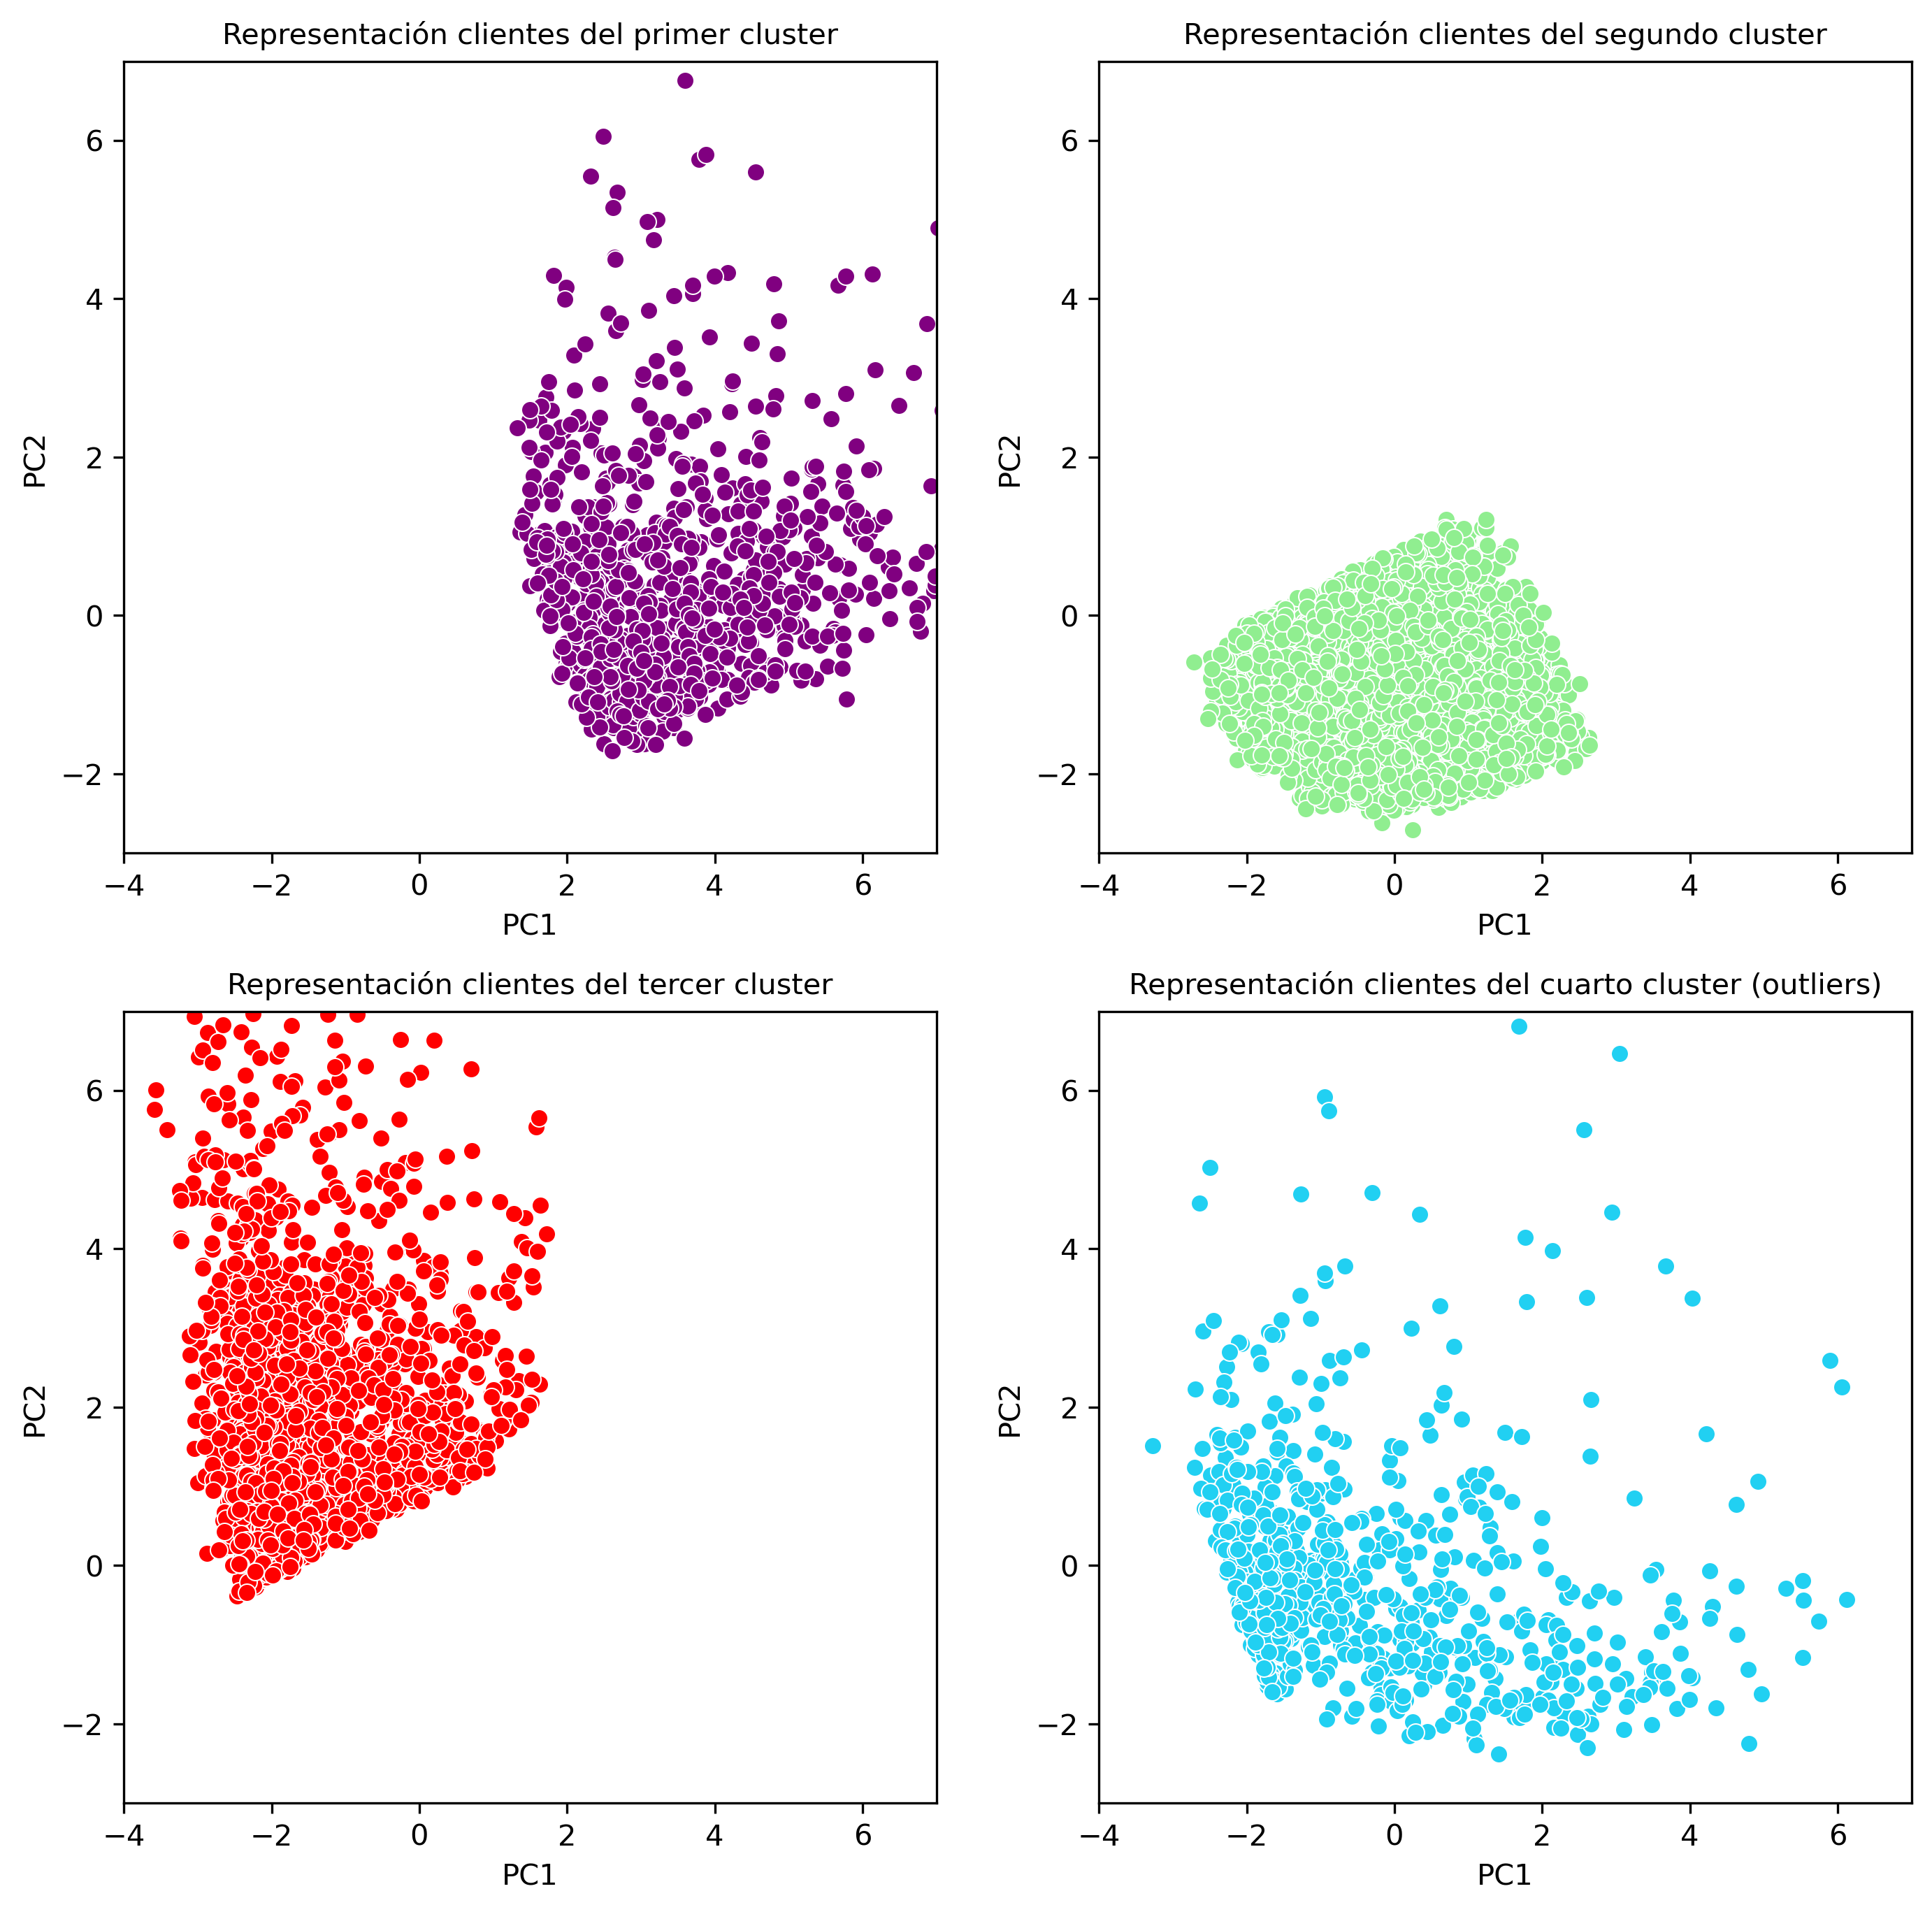

In [327]:
fig,ax = plt.subplots(figsize=(11,11), ncols=2, nrows=2, dpi=300)

sns.scatterplot(data=df_transform[df_transform.cluster == 0],x='PC1',y='PC2',ax=ax[0,0], color="purple")
sns.scatterplot(data=df_transform[df_transform.cluster == 1],x='PC1',y='PC2',ax=ax[0,1], color="lightgreen")
sns.scatterplot(data=df_transform[df_transform.cluster == 2],x='PC1',y='PC2',ax=ax[1,0], color="red")
sns.scatterplot(data=df_transform[df_transform.cluster == 3],x='PC1',y='PC2',ax=ax[1,1], color="#21d0f2")

ax[0,0].set_xlim([-4,7])
ax[0,0].set_ylim([-3,7])
ax[0,1].set_xlim([-4,7])
ax[0,1].set_ylim([-3,7])
ax[1,0].set_xlim([-4,7])
ax[1,0].set_ylim([-3,7])
ax[1,1].set_xlim([-4,7])
ax[1,1].set_ylim([-3,7])

ax[0,0].set_title('Representación clientes del primer cluster', size=10)
ax[0,1].set_title('Representación clientes del segundo cluster', size=10)
ax[1,0].set_title('Representación clientes del tercer cluster', size=10)
ax[1,1].set_title('Representación clientes del cuarto cluster (outliers)', size=10)

La siguiente visualización pretende mostrar lo mismo que la anterior pero de otra forma en la que se ve mejor. El color azul simboliza que la densidad de clientes en esa zona es mayor, y a medida que se va suavizando el color disminuye la densidad de puntos. Se ve que los tres clusters están muy diferenciados en función de estas dos primeras componentes.

Text(0.5, 1.0, 'Representación clientes del cuarto cluster (outliers)')

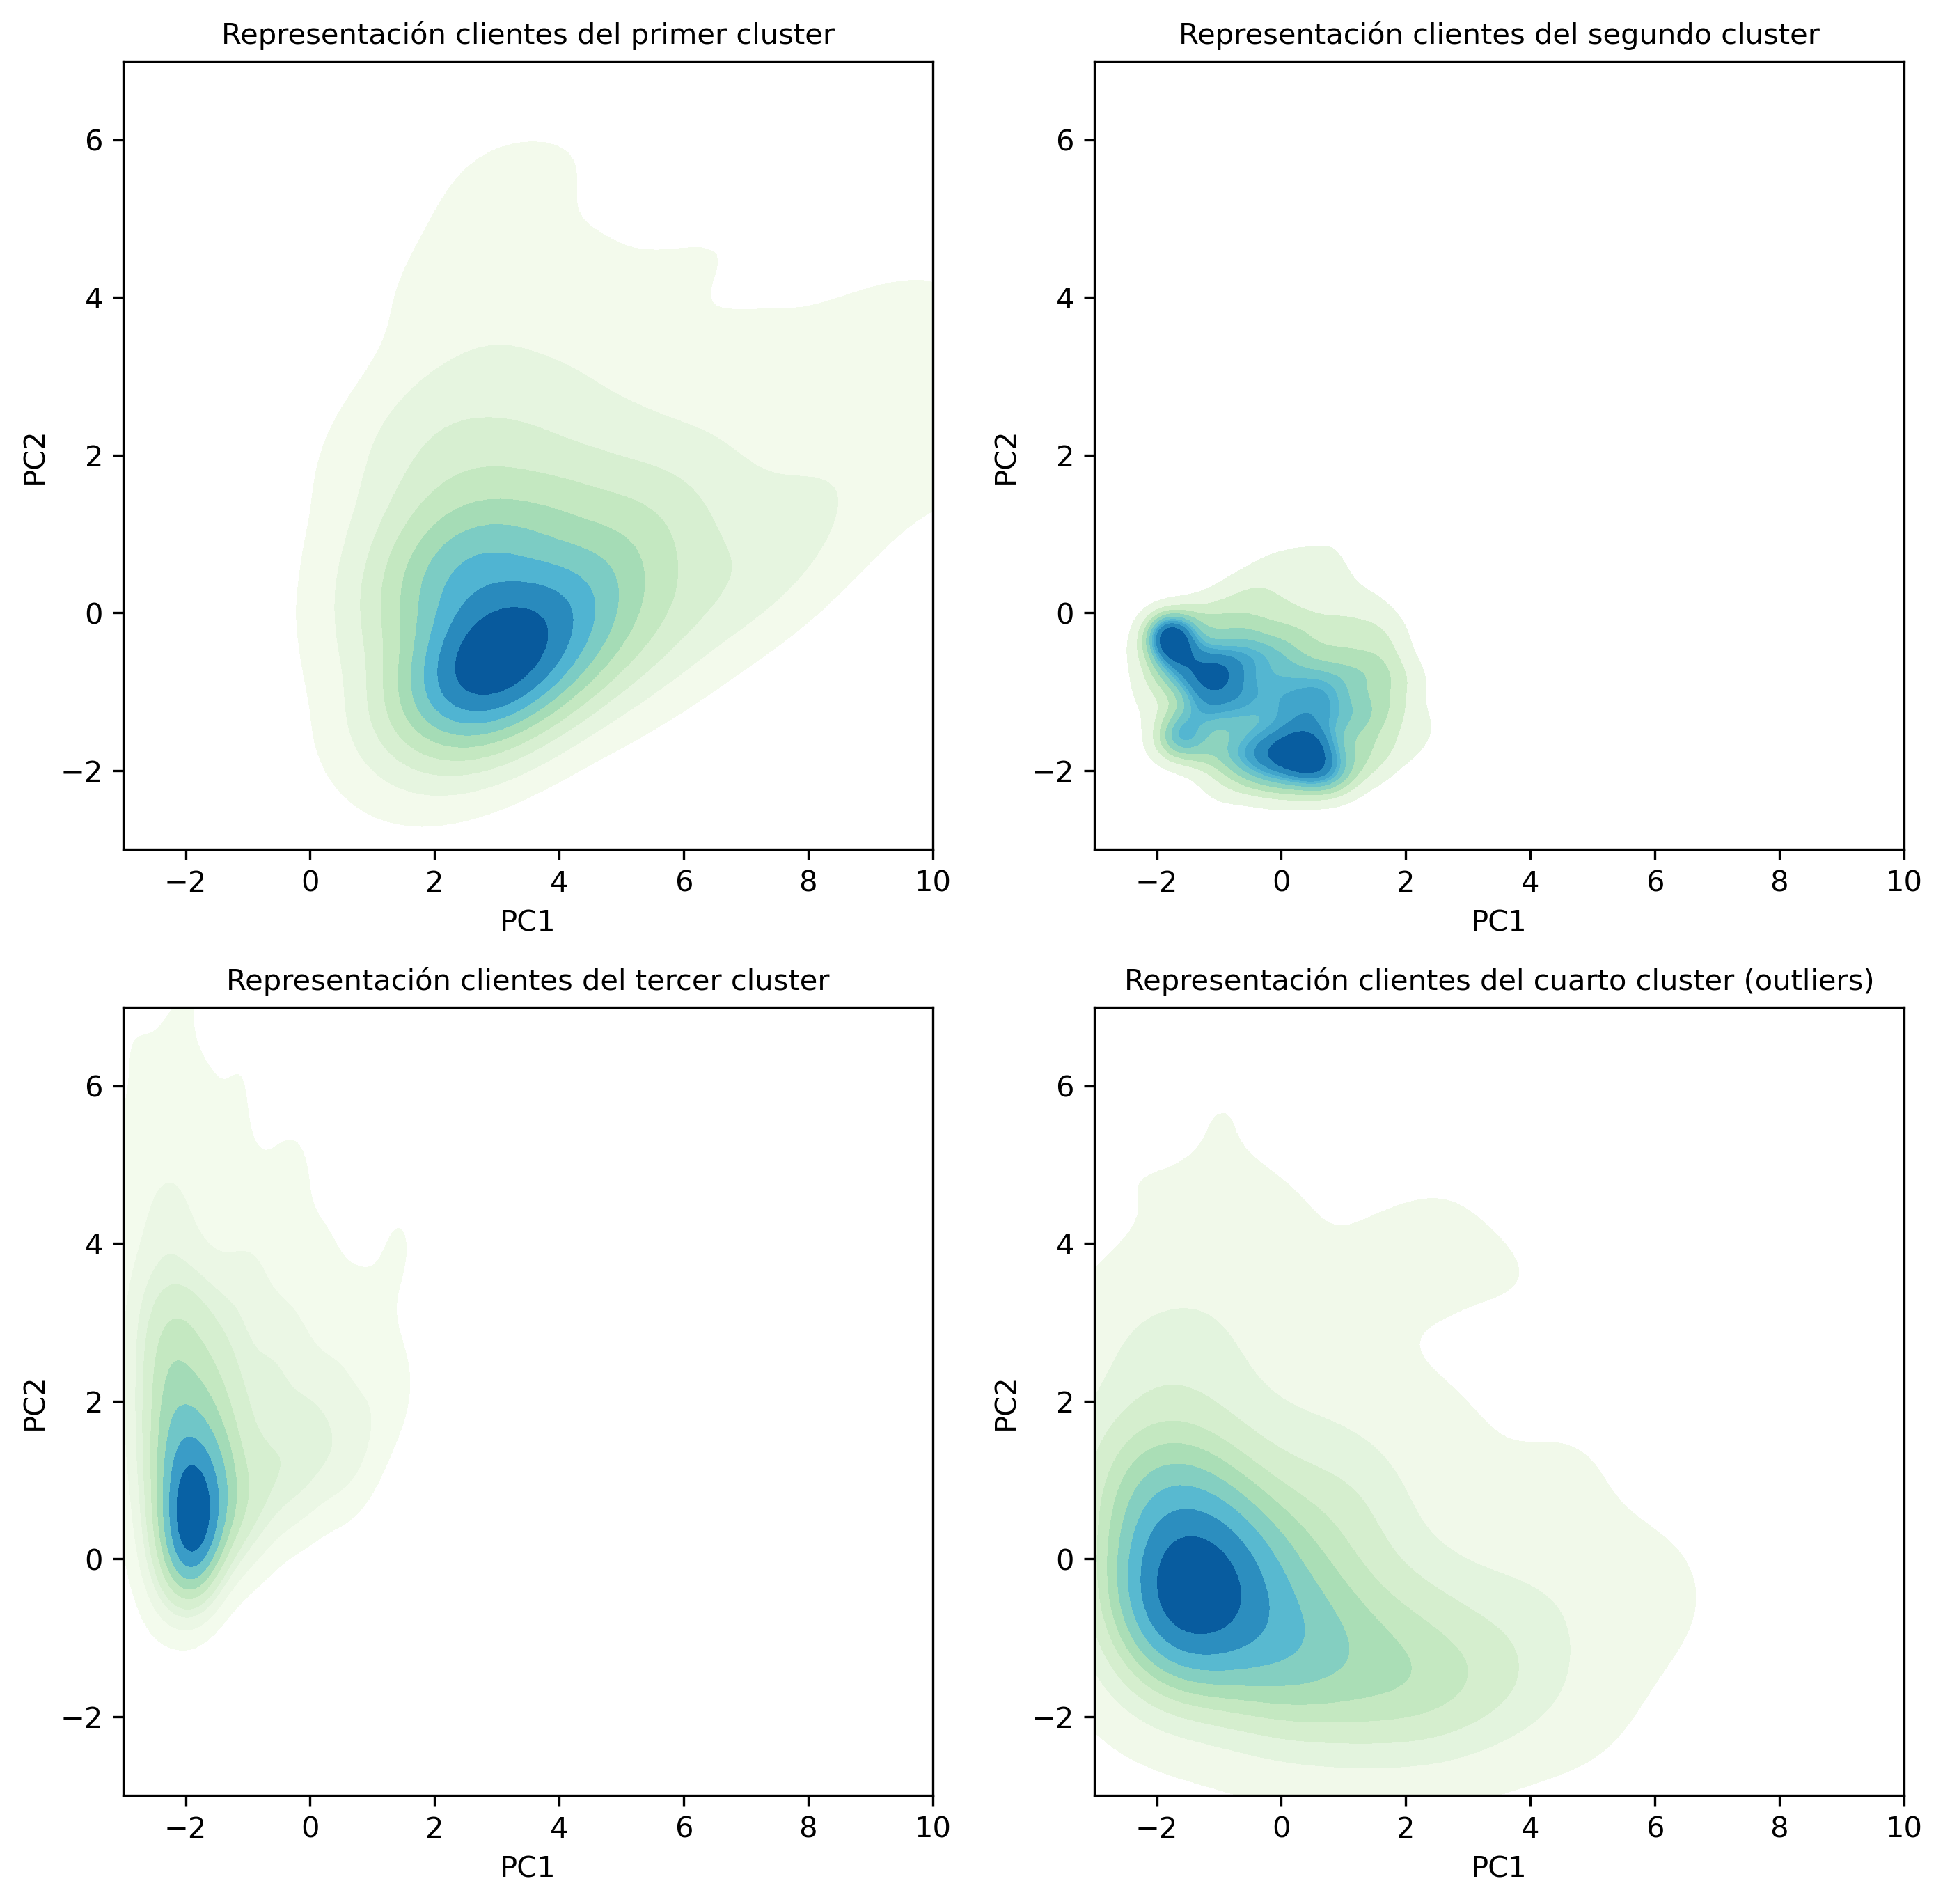

In [328]:
fig,ax = plt.subplots(figsize=(11,11), ncols=2, nrows=2, dpi=300)

sns.kdeplot(data=df_transform[df_transform.cluster == 0],x='PC1',y='PC2',ax=ax[0,0], levels=10, fill=True, cmap='GnBu')
sns.kdeplot(data=df_transform[df_transform.cluster == 1],x='PC1',y='PC2',ax=ax[0,1], levels=10, fill=True, cmap='GnBu')
sns.kdeplot(data=df_transform[df_transform.cluster == 2],x='PC1',y='PC2',ax=ax[1,0], levels=10, fill=True, cmap='GnBu')
sns.kdeplot(data=df_transform[df_transform.cluster == 3],x='PC1',y='PC2',ax=ax[1,1], levels=10, fill=True, cmap='GnBu')

ax[0,0].set_facecolor('#FFFFFF')
ax[0,1].set_facecolor('#FFFFFF')
ax[1,0].set_facecolor('#FFFFFF')
ax[1,1].set_facecolor('#FFFFFF')

ax[0,0].set_xlim([-3,10])
ax[0,0].set_ylim([-3,7])
ax[0,1].set_xlim([-3,10])
ax[0,1].set_ylim([-3,7])
ax[1,0].set_xlim([-3,10])
ax[1,0].set_ylim([-3,7])
ax[1,1].set_xlim([-3,10])
ax[1,1].set_ylim([-3,7])

ax[0,0].set_title('Representación clientes del primer cluster', size=10)
ax[0,1].set_title('Representación clientes del segundo cluster', size=10)
ax[1,0].set_title('Representación clientes del tercer cluster', size=10)
ax[1,1].set_title('Representación clientes del cuarto cluster (outliers)', size=10)

Text(0.5, 0.98, 'Representación de los clusters en función de las PCs')

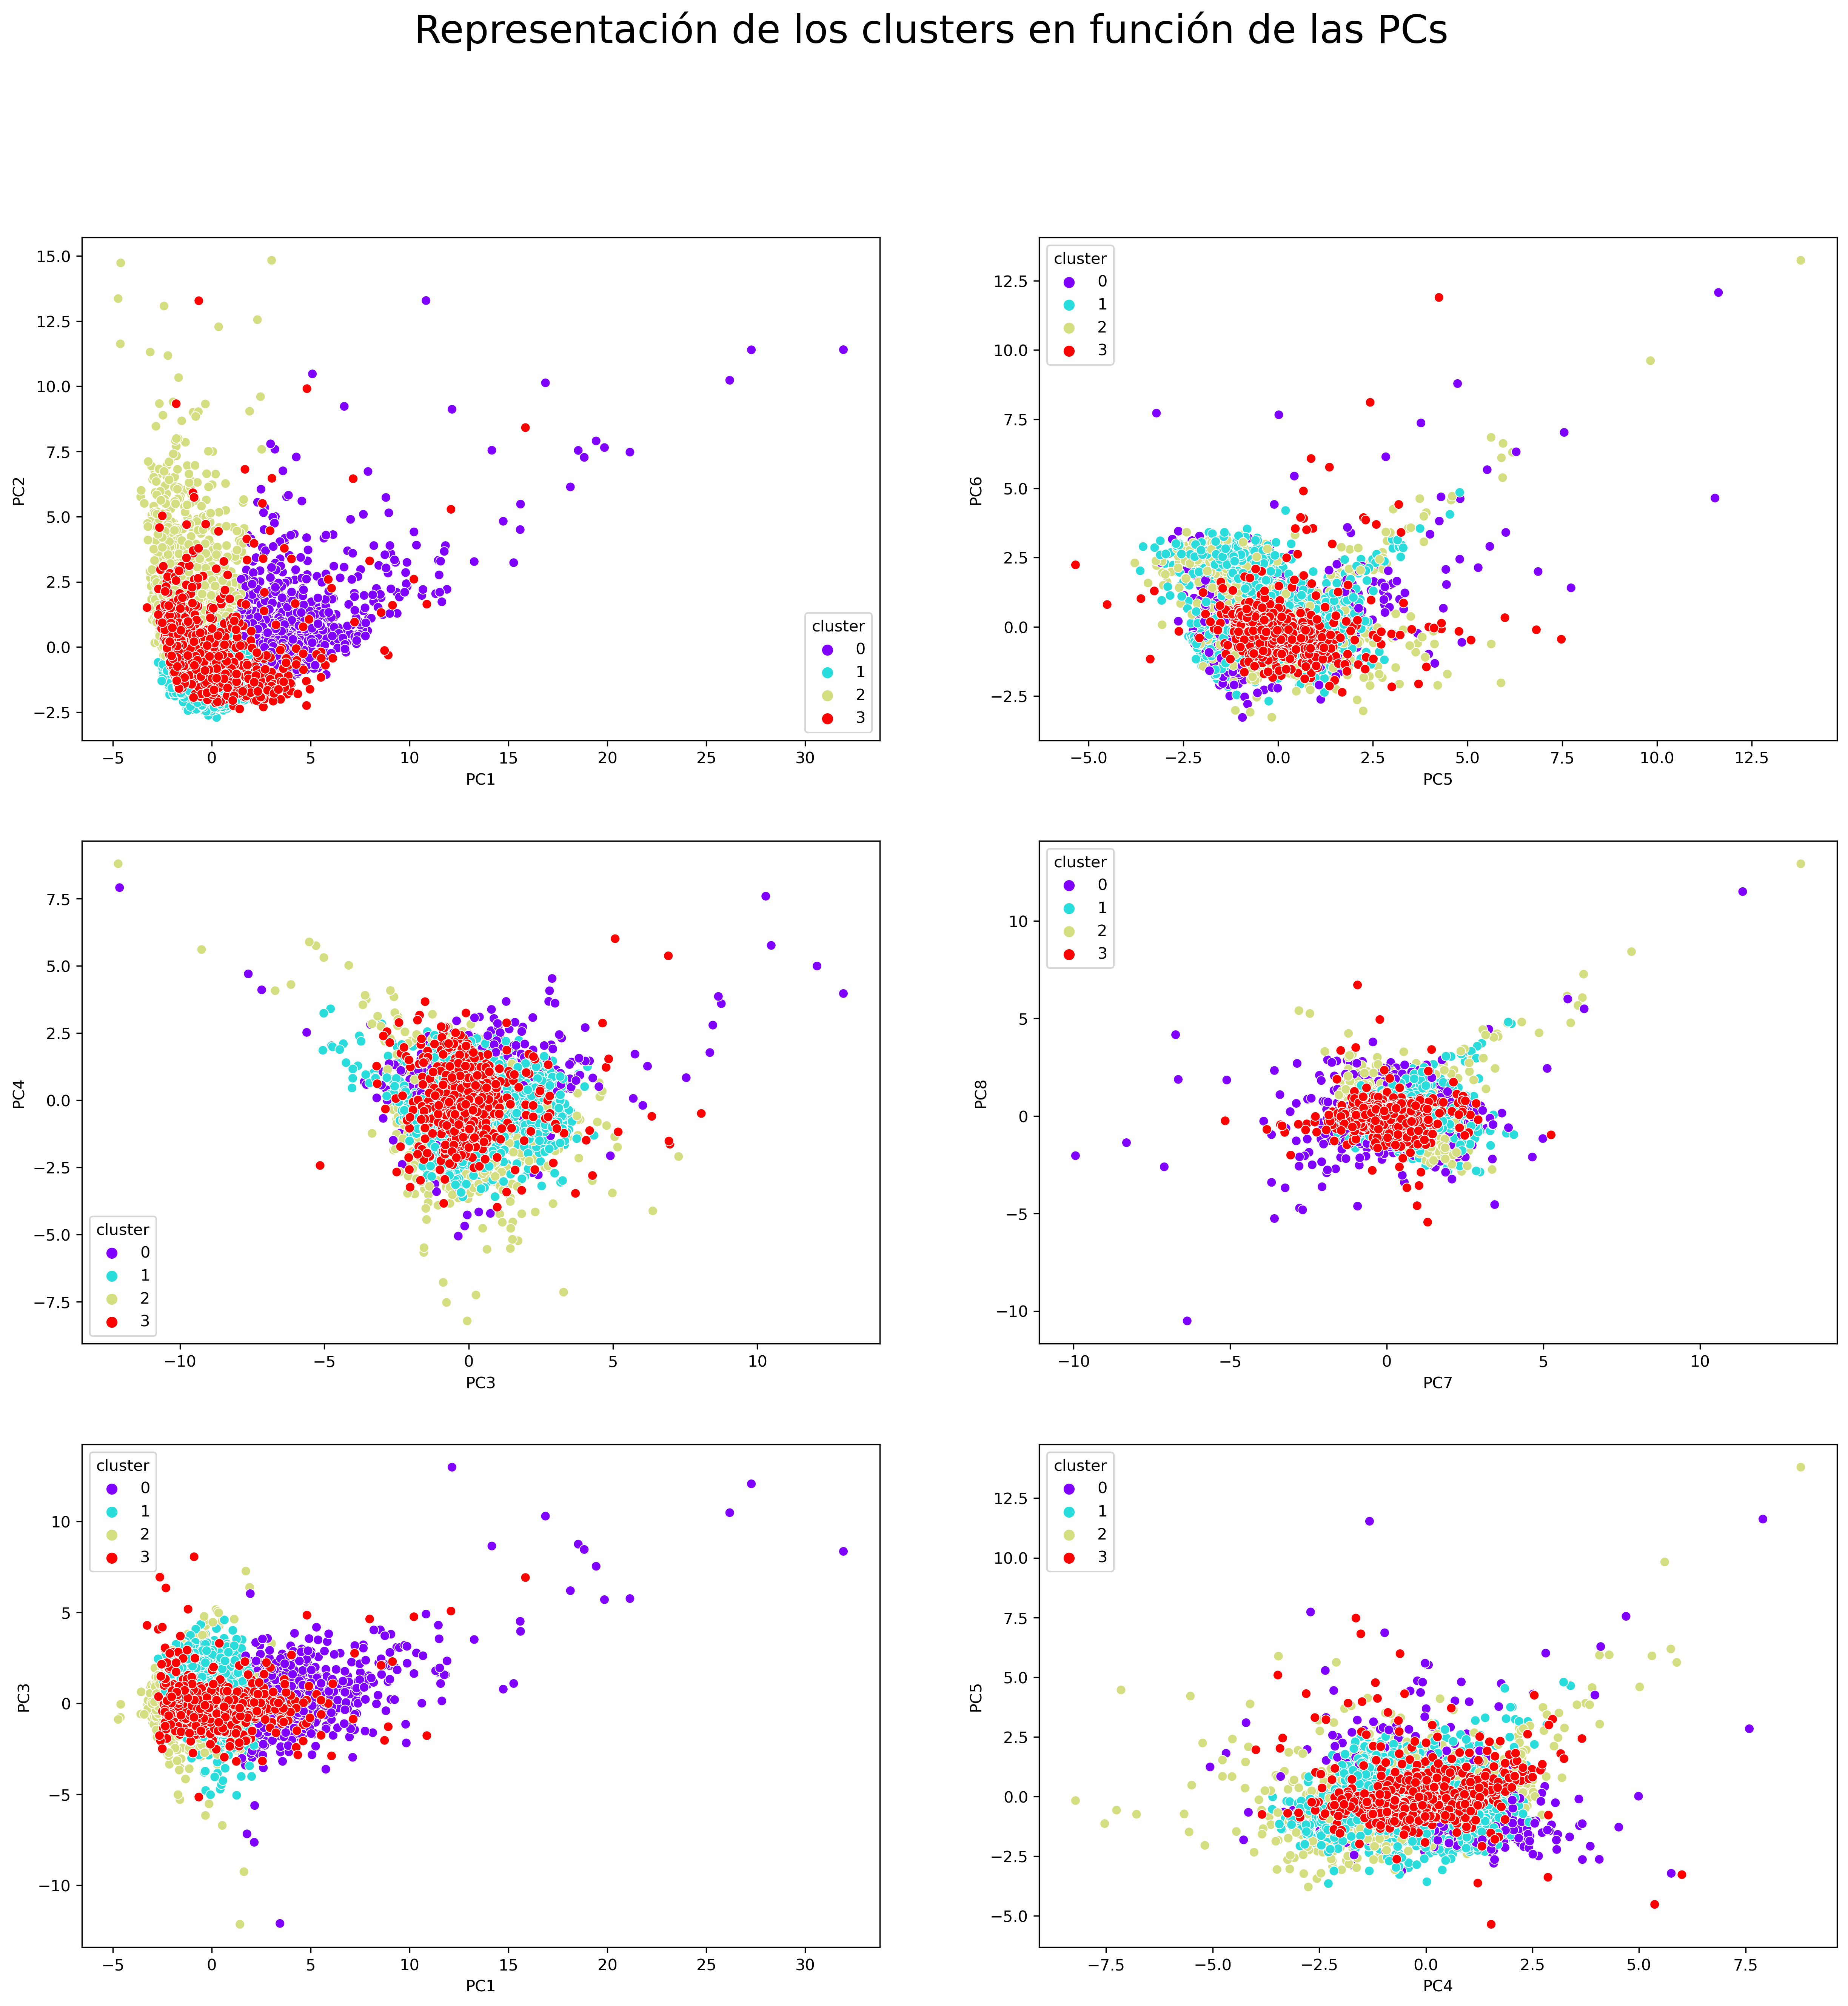

In [329]:
fig,axes = plt.subplots(figsize=(20,20),ncols=2,nrows=3, dpi=300)

sns.scatterplot(data=df_transform,x='PC1',y='PC2',hue='cluster',palette='rainbow',ax=axes[0,0])
sns.scatterplot(data=df_transform,x='PC3',y='PC4',hue='cluster',palette='rainbow',ax=axes[1,0])
sns.scatterplot(data=df_transform,x='PC5',y='PC6',hue='cluster',palette='rainbow',ax=axes[0,1])
sns.scatterplot(data=df_transform,x='PC7',y='PC8',hue='cluster',palette='rainbow',ax=axes[1,1])
sns.scatterplot(data=df_transform,x='PC1',y='PC3',hue='cluster',palette='rainbow',ax=axes[2,0])
sns.scatterplot(data=df_transform,x='PC4',y='PC5',hue='cluster',palette='rainbow',ax=axes[2,1])

fig.suptitle('Representación de los clusters en función de las PCs', fontsize = 25)

In [330]:
df_client

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10005    817.714335           1.000000      16.00             16.00   
C10006   1809.828751           1.000000    1333.28              0.00   
...              ...                ...        ...               ...   
C19184      5.871712           0.500000      20.90             20.90   
C19186     28.493517           1.000000     291.12              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10005                     0.00      0.000000             0.083333   
C10006                  1333.28      0.000000             0.666667   
...                         ...           ...                  ...   
C19184                     0.00      0.000000             0.166667   
C19186                   291.12      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10005                     0.083333                          0.000000   
C10006                     0.000000                          0.583333   
...                             ...                               ...   
C19184                     0.166667                          0.000000   
C19186                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10005                 0.000000                 0              1   
C10006                 0.000000                 0              8   
...                         ...               ...            ...   
C19184                 0.000000                 0              1   
C19186                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742

In [331]:
df_out

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                 
C10016    6886.213231           1.000000    1611.70              0.00   
C10022    6369.531318           1.000000    6359.95           5910.04   
C10025    5368.571219           1.000000       0.00              0.00   
C10029    7152.864372           1.000000     387.05            204.55   
C10031   12136.219960           1.000000    3038.01           1013.20   
...               ...                ...        ...               ...   
C18530    6008.914524           0.777778       0.00              0.00   
C18637    5934.610587           1.000000       0.00              0.00   
C18666    5484.339435           1.000000       0.00              0.00   
C18942    7302.672686           1.000000       0.00              0.00   
C19182    5967.475270           0.833333     214.55              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10016                  1611.70   2301.491267             0.500000   
C10022                   449.91    229.028245             1.000000   
C10025                     0.00    798.949863             0.000000   
C10029                   182.50   2236.145259             0.666667   
C10031                  2024.81   3183.583301             1.000000   
...                         ...           ...                  ...   
C18530                     0.00   8304.470149             0.000000   
C18637                     0.00    302.678437             0.000000   
C18666                     0.00   5990.590134             0.000000   
C18942                     0.00  10762.707760             0.000000   
C19182                   214.55   8555.409326             0.833333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10016                     0.000000                          0.500000   
C10022                     0.916667                          1.000000   
C10025                     0.000000                          0.000000   
C10029                     0.166667                          0.416667   
C10031                     0.166667                          1.000000   
...                             ...                               ...   
C18530                     0.000000                          0.000000   
C18637                     0.000000                          0.000000   
C18666                     0.000000                          0.000000   
C18942                     0.000000                          0.000000   
C19182                     0.000000                          0.666667   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10016                 0.166667                 4             11   
C10022                 0.333333                 6             92   
C10025                 0.363636                 4              0   
C10029                 0.833333                16              8   
C10031                 0.500000                10             64   
...                         ...               ...            ...   
C18530                 0.333333                 9              0   
C18637                 0.250000                 5              0   
C18666                 0.250000                14              0   
C18942                 0.750000                19              0   
C19182                 0.666667                13              5   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10016         8000.0  1993.439277       2109.906490               0.0   
C10022        11250.0  2077.959051       1659.775075               0.0   
C10025         6000.0 

In [332]:
df_clusters = df_client.append(df_out)

In [333]:
#df_clusters.to_pickle('../../Trabajo 3 Info/df_clusters.pkl')

In [334]:
df_clusters.to_csv('../../Trabajo 3 Info/df_clusters.csv')

### CONCLUSIÓN CLUSTERING KMEANS

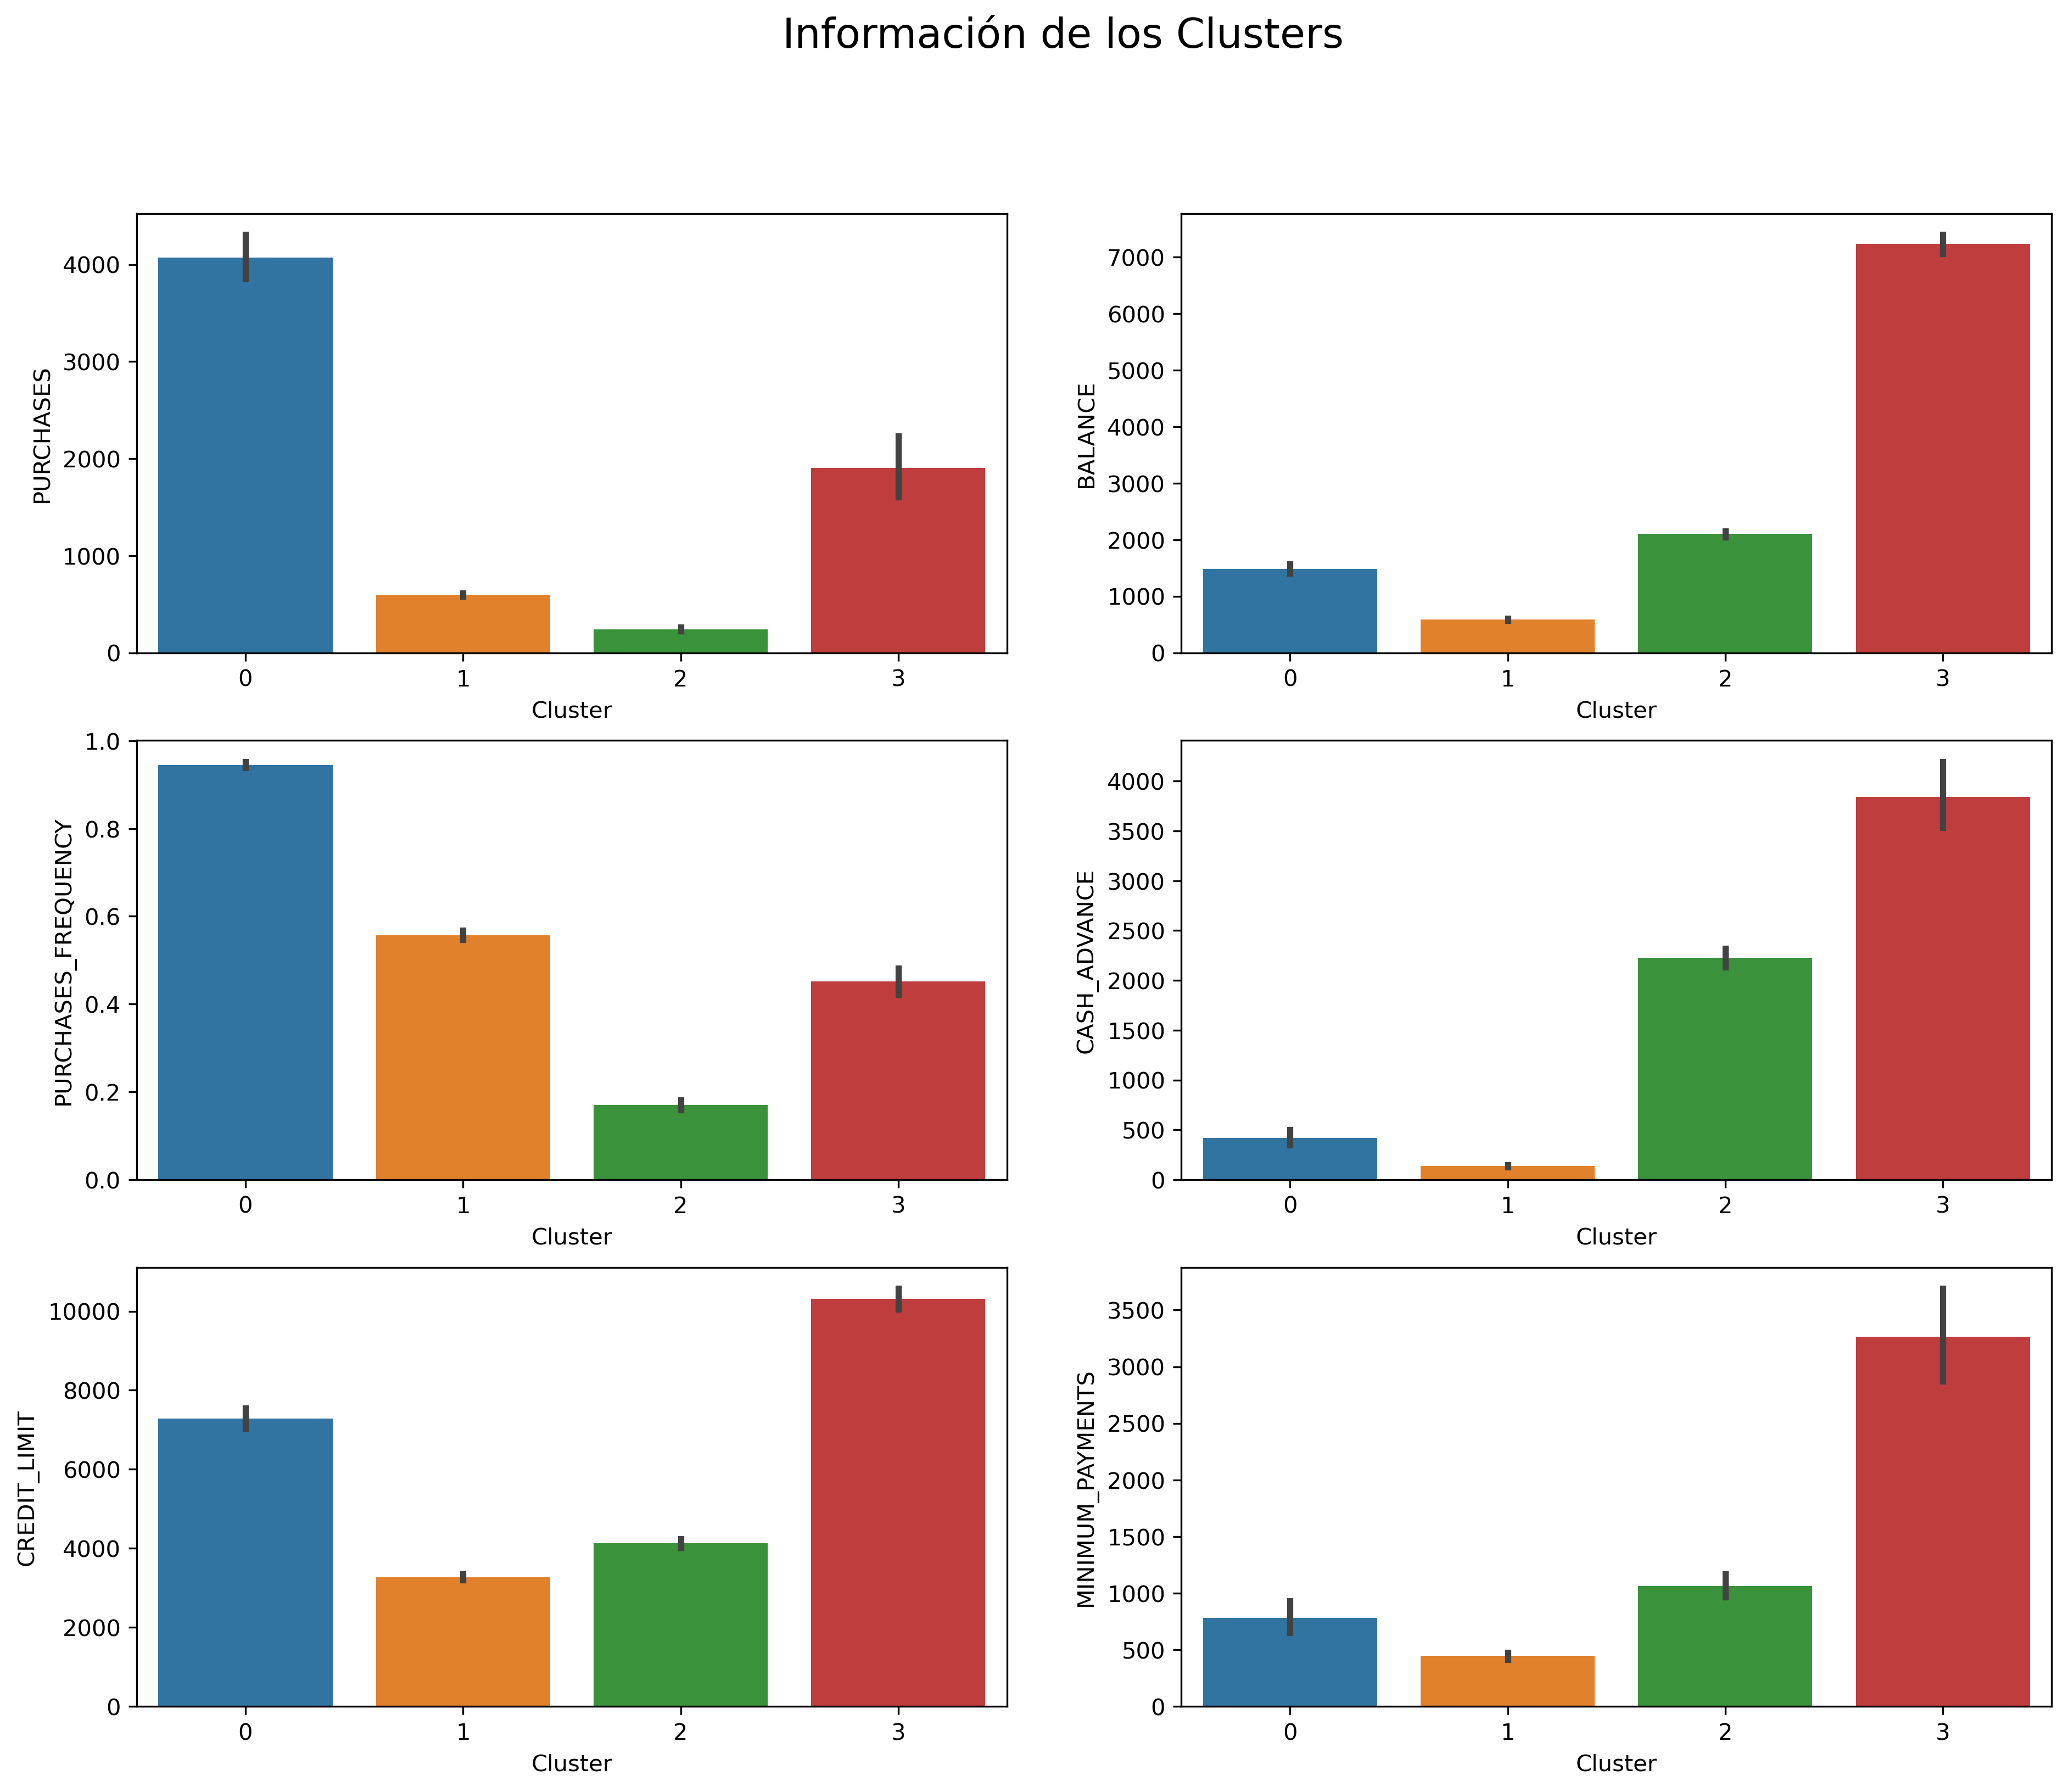

In [335]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12), dpi=300)

fig.suptitle('Información de los Clusters', fontsize = 18)

ax1 = sns.barplot(ax=axes[0, 0], data = df_clusters, x="cluster", y="PURCHASES")
ax1.set(xlabel='Cluster', ylabel='PURCHASES')

ax2 = sns.barplot(ax=axes[0, 1], data = df_clusters, x="cluster", y="BALANCE")
ax2.set(xlabel='Cluster', ylabel='BALANCE')

ax3 = sns.barplot(ax=axes[1, 0], data = df_clusters, x="cluster", y="PURCHASES_FREQUENCY")
ax3.set(xlabel='Cluster', ylabel='PURCHASES_FREQUENCY')

ax4 = sns.barplot(ax=axes[1, 1], data = df_clusters, x="cluster", y="CASH_ADVANCE")
ax4.set(xlabel='Cluster', ylabel='CASH_ADVANCE')

ax5 = sns.barplot(ax=axes[2, 0], data = df_clusters, x="cluster", y="CREDIT_LIMIT")
ax5.set(xlabel='Cluster', ylabel='CREDIT_LIMIT')

ax6 = sns.barplot(ax=axes[2, 1], data = df_clusters, x="cluster", y="MINIMUM_PAYMENTS")
ax6.set(xlabel='Cluster', ylabel='MINIMUM_PAYMENTS')

plt.show()

### PLOTLY

In [336]:
means_credit_limit = df_clusters.groupby('cluster').mean()['CREDIT_LIMIT'].values
means_balance_limit = df_clusters.groupby('cluster').mean()['BALANCE'].values
means_purchases_limit = df_clusters.groupby('cluster').mean()['PURCHASES'].values
means_cash_advance_limit = df_clusters.groupby('cluster').mean()['CASH_ADVANCE'].values
means_minimum_payments_limit = df_clusters.groupby('cluster').mean()['MINIMUM_PAYMENTS'].values
means_purchases_frecuency_limit = df_clusters.groupby('cluster').mean()['PURCHASES_FREQUENCY'].values

In [337]:
cluster_names = ["0","1","2","3"]

In [338]:
df_clusters_list = pd.DataFrame({'cluster': cluster_names,'cluster_means': means_credit_limit})

In [339]:
df_clusters_list

cluster  cluster_means
0       0    7284.607938
1       1    3272.034108
2       2    4131.819553
3       3   10309.629630

In [340]:
fig = px.bar(df_clusters_list, x = "cluster", y ="cluster_means" , color='cluster')
fig.update_layout(title = "Información de los Clusters", 
                  title_x=0.5)
fig.show()

In [341]:
data = [
    go.Bar(
        x = cluster_names,
        y = means_credit_limit,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred"]
    )
]

layout = go.Layout(title = "DISTRIBUCIÓN DEL LÍMITE DE CRÉDITO ENTRE CLUSTERS", xaxis_title = "CLUSTERS", 
                   yaxis_title = "CREDIT LIMIT", title_x=0.5)

fig = go.Figure(data = data, layout = layout)

fig.show()

In [342]:
data1 = go.Bar(x = cluster_names, y = means_purchases_limit, name = "PURCHASES")
data2 = go.Bar(x = cluster_names, y = means_balance_limit, name = "BALANCE")

data= [data1, data2]

layout = go.Layout(title = "CREDIT LIMIT VS. BALANCE PARA CADA CLUSTER", xaxis_title = "CLUSTERS", title_x=0.45)

fig = go.Figure(data = data, layout = layout)

fig.show()

In [343]:
fig = make_subplots(rows = 3,
                    cols = 2,
                    #subplot_titles=("Distribución de las notas", "Impacto del test previo", 
                                    #"Media según la formación de los padres",
                                    #"Media por formación y grupo étnico")
                   )

fig.add_trace(
    go.Bar(
        x = cluster_names,
        y = means_credit_limit,
        name = "Parental level",
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred"]
    ),
    row = 1,
    col = 1
)


# Segundo gráfico
fig.add_trace(
    go.Bar(
        x = cluster_names,
        y = means_balance_limit,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred"]
    ),
    row = 1,
    col = 2
)

# Tercer gráfico
fig.add_trace(
    go.Bar(
        x = cluster_names,
        y = means_purchases_limit,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred"]
    ),
    row = 2,
    col = 1
)

# Cuarto gráfico
fig.add_trace(
    go.Bar(
        x = cluster_names,
        y = means_cash_advance_limit,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred"]
    ),
    row = 2,
    col = 2
)

# Quinto gráfico
fig.add_trace(
    go.Bar(
        x = cluster_names,
        y = means_minimum_payments_limit,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred"]
    ),
    row = 3,
    col = 1
)

# Sexto gráfico
fig.add_trace(
    go.Bar(
        x = cluster_names,
        y = means_purchases_frecuency_limit,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred"]
    ),
    row = 3,
    col = 2
)

# Modifico las dimensiones totales y el titulo global
fig.update_layout(width = 1000, height = 900, title = "Información de los Clusters", 
                  title_x=0.5, bargap = 0.2, showlegend=False)

fig.update_xaxes(title_text = "Clusters", row = 1, col = 1)
fig.update_yaxes(title_text = "Credit Limit", row = 1, col = 1)

fig.update_xaxes(title_text = "Clusters", row = 1, col = 2)
fig.update_yaxes(title_text = "Balance", row = 1, col = 2)

fig.update_xaxes(title_text = "Clusters", row = 2, col = 1)
fig.update_yaxes(title_text = "Purchases", row = 2, col = 1)

fig.update_xaxes(title_text = "Clusters", row = 2, col = 2)
fig.update_yaxes(title_text = "Cash Advance", row = 2, col = 2)

fig.update_xaxes(title_text = "Clusters", row = 3, col = 1)
fig.update_yaxes(title_text = "Minimum Payments", row = 3, col = 1)

fig.update_xaxes(title_text = "Clusters", row = 3, col = 2)
fig.update_yaxes(title_text = "Purchases Frecuency", row = 3, col = 2)

fig.show()



### AHORA REPRESENTAREMOS PARA CADA CLUSTER LAS VARIABLES EXPLICATIVAS

In [344]:
means_credit_limit = df_clusters.groupby('cluster').mean()['CREDIT_LIMIT'].values
means_balance_limit = df_clusters.groupby('cluster').mean()['BALANCE'].values
means_purchases_limit = df_clusters.groupby('cluster').mean()['PURCHASES'].values
means_cash_advance_limit = df_clusters.groupby('cluster').mean()['CASH_ADVANCE'].values
means_minimum_payments_limit = df_clusters.groupby('cluster').mean()['MINIMUM_PAYMENTS'].values
means_payments_limit = df_clusters.groupby('cluster').mean()['PAYMENTS'].values

In [345]:
cluster_names

['0', '1', '2', '3']

In [346]:
df_variables = pd.DataFrame(
                    {'cluster': cluster_names,
                     'credit_limit': means_credit_limit,
                     'balance': means_balance_limit,
                     'pruchases': means_purchases_limit,
                     'cash_advance': means_cash_advance_limit,
                     'minimum_payments': means_minimum_payments_limit,
                     'payments': means_payments_limit,
                    })

In [347]:
df_variables

cluster  credit_limit      balance    pruchases  cash_advance  \
0       0   7284.607938  1483.370003  4070.525973    416.412323   
1       1   3272.034108   587.491306   599.382552    136.452908   
2       2   4131.819553  2100.521034   243.428715   2225.840189   
3       3  10309.629630  7232.476288  1903.598919   3840.969261   

   minimum_payments     payments  
0        781.144880  4083.630226  
1        445.604001   879.249391  
2       1063.410985  1934.865207  
3       3266.247218  4100.758674

In [348]:
variable_names= ['Credit Limit', 'Balance', 'Purchases', 'Cash Advance', 'Minimum Payments', 'Payments']

In [349]:
valores_primer_cluster = np.array([7284.607938, 1483.370003, 4070.525973, 416.412323, 781.144880, 4083.630226])

In [350]:
valores_segundo_cluster = np.array([3272.034108, 587.491306, 599.382552, 136.452908, 445.604001, 879.249391]) 

In [351]:
valores_tercer_cluster = np.array([4131.819553, 2100.521034, 243.428715, 2225.840189, 1063.410985, 1934.865207])

In [352]:
valores_cuarto_cluster = np.array([10309.629630, 7232.476288, 1903.598919, 3840.969261, 3266.247218, 4100.758674])

In [353]:
data = [
    go.Bar(
        x = variable_names,
        y = valores_primer_cluster,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred","lightblue", "purple"]#,,"lightblue","indigo",'black'],
    )
]

layout = go.Layout(title = "DISTRIBUCIÓN DE VARIABLES PARA EL PRIMER CLUSTER", xaxis_title = "VARIABLES", 
                   yaxis_title = "CLUSTER 0", title_x=0.5)

fig = go.Figure(data = data, layout = layout)
fig.update_yaxes(range=[0,10000])

fig.show()

In [354]:
data = [
    go.Bar(
        x = variable_names,
        y = valores_segundo_cluster,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred","lightblue", "purple"]#,,"lightblue","indigo",'black'],
    )
]

layout = go.Layout(title = "DISTRIBUCIÓN DE VARIABLES PARA EL SEGUNDO CLUSTER", xaxis_title = "VARIABLES", 
                   yaxis_title = "CLUSTER 1", title_x=0.5)

fig = go.Figure(data = data, layout = layout)
fig.update_yaxes(range=[0,10000])

fig.show()

In [355]:
data = [
    go.Bar(
        x = variable_names,
        y = valores_tercer_cluster,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred","lightblue", "purple"]#,,"lightblue","indigo",'black'],
    )
]

layout = go.Layout(title = "DISTRIBUCIÓN DE VARIABLES PARA EL TERCER CLUSTER", xaxis_title = "VARIABLES", 
                   yaxis_title = "CLUSTER 2", title_x=0.5)

fig = go.Figure(data = data, layout = layout)
fig.update_yaxes(range=[0,10000])

fig.show()

In [356]:
data = [
    go.Bar(
        x = variable_names,
        y = valores_cuarto_cluster,
        marker_color = ["cornflowerblue","sandybrown","mediumseagreen", "indianred","lightblue", "purple"]#,,"lightblue","indigo",'black'],
    )
]

layout = go.Layout(title = "DISTRIBUCIÓN DE VARIABLES PARA EL CUARTO CLUSTER", xaxis_title = "VARIABLES", 
                   yaxis_title = "CLUSTER 3", title_x=0.5)

fig = go.Figure(data = data, layout = layout)
fig.update_yaxes(range=[0,10000])

fig.show()

In [357]:
cluster = pd.Series(data = df_clusters['cluster'])
cluster.value_counts()

1    4718
2    2210
0    1033
3     675
Name: cluster, dtype: int64

En las gráficas anteriores se muestran los 3 clusters según algunas de sus características. Los comportamientos de los clientes en cada cluster es el siguiente: 

0. Cluster 0: poco balance y pocas compras.
Purchases (bajo), balance (bajo), purchases_frequency (bajo), cash_advance(bajo), credit_limit(medio) y minimum_payment (bajo).
El grupo de clientes que pertenecen al cluster 0 es el más numeroso, y corresponde a aquellos clientes que tienen poco balance, y además compran poco. Por esa razón, ademas tienen un límite de crédito medio y bajo cash advance.


1. Cluster 1: balance medio y muchas compras (gastones).
Purchases (alto), balance (medio), purchases_frequency (alto), cash_advance(bajo), credit_limit(alto) y minimum_payment (medio).
El grupo de clientes que pertenecen al cluster 1 es menos numeroso que el anterior. Este tipo de clientes tienen un balance medio y realizan compras frecuentemente y de gran magnitud. Este grupo tiene el límite de crédito más alto. 


2. Cluster 2: mucho balance y pocas compras (ahorradores).
Purchases (bajo), balance (alto), purchases_frequency (bajo), cash_advance(alto), credit_limit(alto) y minimum_payment (alto).
El grupo de clientes que pertenecen al cluster 1 tiene prácticamente el mismo número de individuos que el cluster anterior. Estas personas tienen mucho balance y por tanto mucho límite de crédito. Sin embargo, es el grupo que menos compras hace, en cuanto a la cantidad y la frecuencia. 


3. Cluster 3: AÑADIR


En todos los clusters hay un balance frequency alto, esto quiere decir que el saldo se actualiza frecuentemente en todos los clusters, por lo que no es una variable significativa en la creación de clusters.

(0.0, 15000.0)

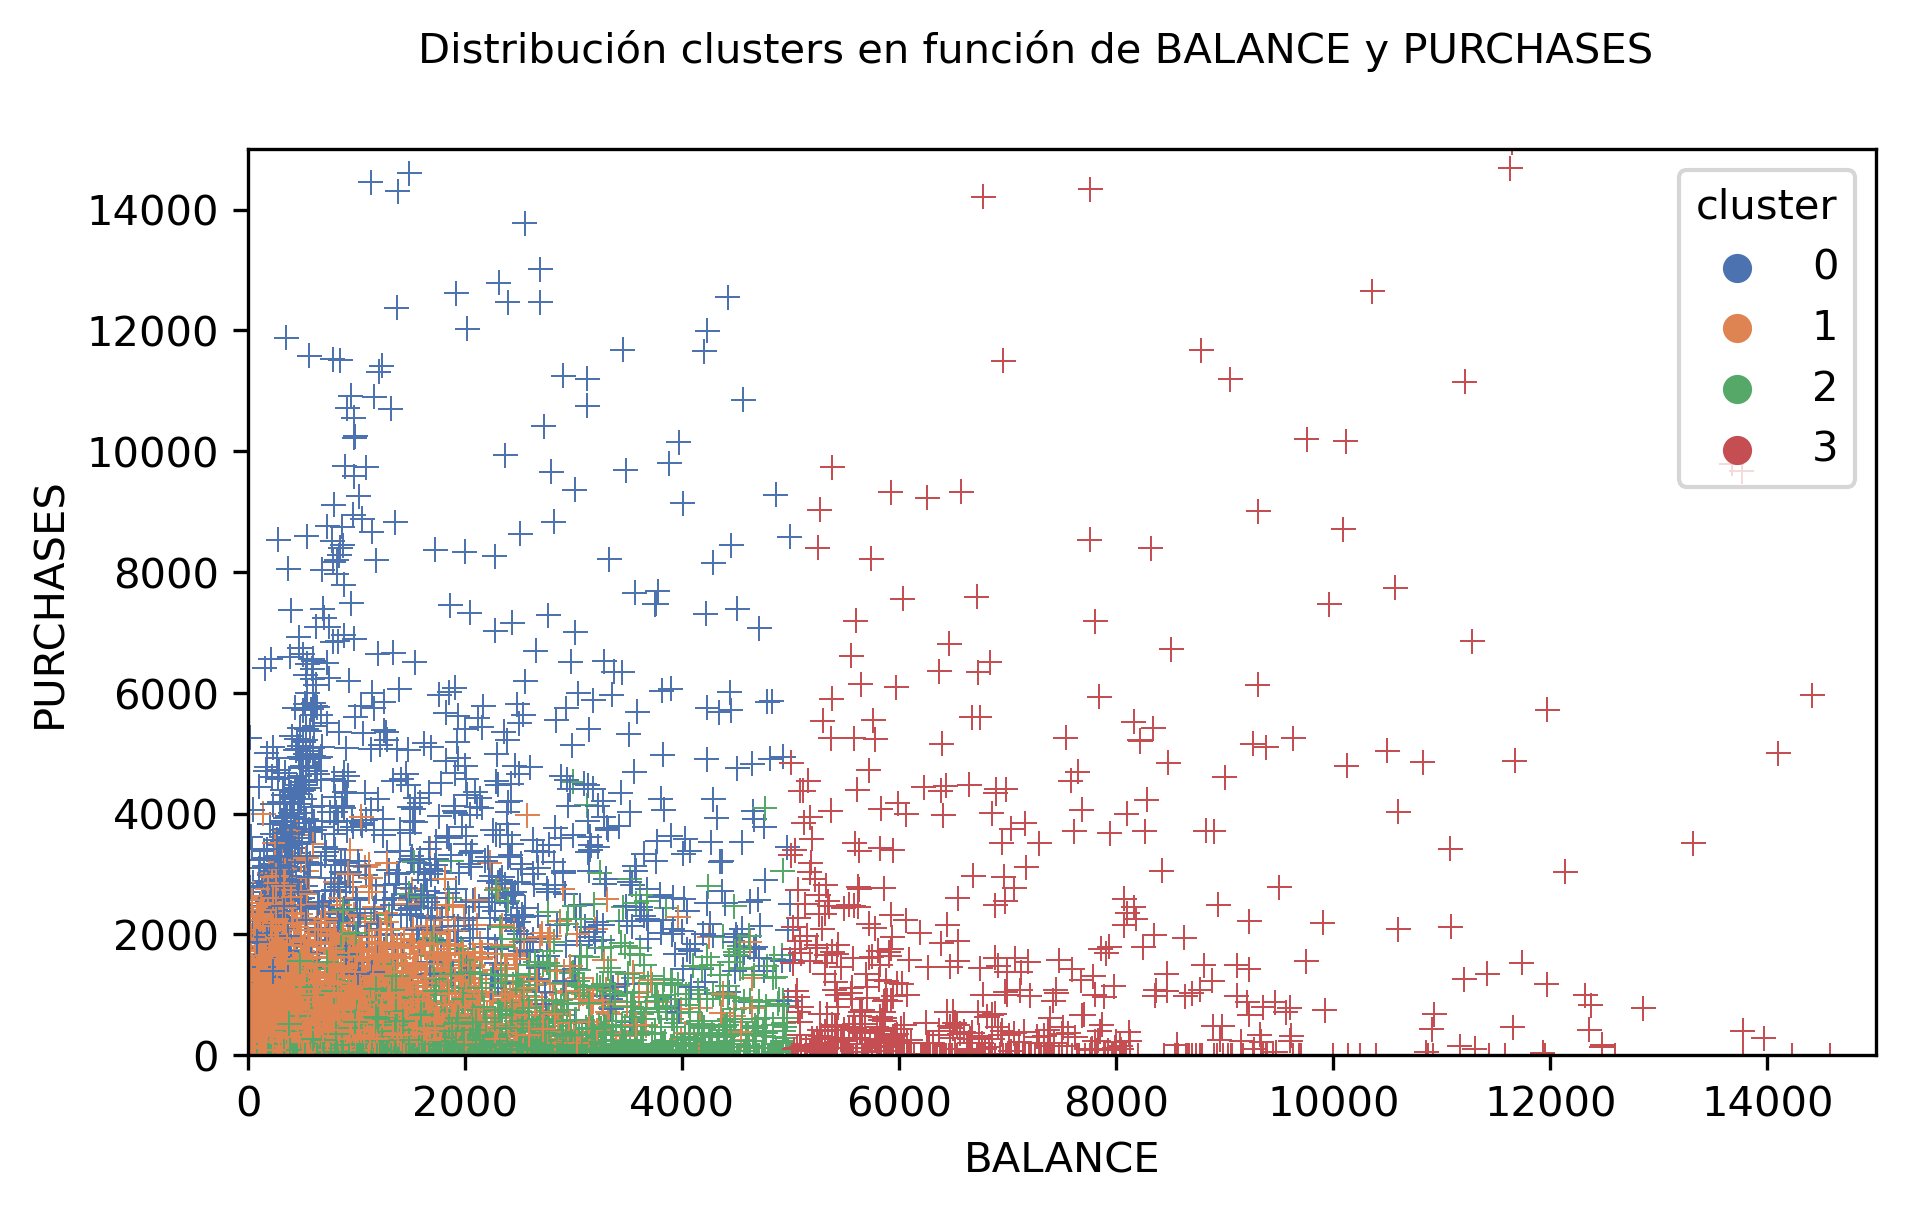

In [358]:
fig, ax = plt.subplots(figsize=(7,4), dpi=300)
fig.suptitle('Distribución clusters en función de BALANCE y PURCHASES', fontsize = 10)

sns.scatterplot(data=df_clusters, x='BALANCE', y='PURCHASES', hue='cluster', palette="deep",marker="+", ax=ax)
ax.set_xlim([0,15000])
ax.set_ylim([0,15000])

In [359]:
fig = px.scatter(df_clusters, x="BALANCE", y="PURCHASES", color="cluster")

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

En este gráfico se remarcan los tres perfiles de clientes en los que ha separado nuestro modelo. En el cluster 0 se encuentran aquellos clientes que tienen menor balance y realizan menores compras. En el cluster 1 se encuentran los clientes que por lo general tienen balance medio pero que realizan muchas compras. Por último, el cluster 2 está formado por los clientes que presentan mucho saldo en su cuenta pero sin embargo no realiza muchas compras. 

### B) CLUSTERING JERÁRQUICO


El siguiente algoritmo que vamos a utilizar es AgglomerativeClustering, perteneciente a Hierarchical Clustering.


En Clustering jerárquico se crean clusters que tienen un orden predeterminado. Los clusters más pequeños se fusionan con los clusters más grandes o los clusters más grandes se dividen en clusters más pequeños. Este es el ciclo de repetición de la agrupación jerárquica. 

Se forma una jerarquía de clusters que se denomina dendograma (mostraremos el dendograma con una altura determinada a continuación). Cuando los clusters pequeños se fusionan con los más grandes, se denomina clustering aglomerativo y es un enfoque ascendente. En cambio, cuando los clústeres más grandes se dividen en otros más pequeños, se denomina enfoque descendente o clúster de división.

Una ventaja de clustering jerárquico es que no se requiere que el usuario especifique de antemano el número de clusters. Se produce una estructura jerárquica para los clusters de acuerdo a una matriz de distancias.

Para el desarrollo del trabajo, se ha optado por utilizar aglomerativo (y no divisivo) para obtener los grupos más dominantes. La distancia escogida es distancia euclídea y el criterio de enlace elegido es ‘ward’ 

Eliminamos la columna de clusters realizada por el algoritmo KMeans.

In [253]:
df_jer = df_clusters.drop(columns='cluster',axis=1)

Se declara el corte de altura y el numero de clusters (ninguno, puesto que después se calculará el número óptimo mostrando el dendograma) y se define el Pipeline (que primero escalará los datos y luego ejecutará el algoritmo de AgglomerativeClustering).

In [161]:
corte_altura=120
num_clusters=None

pipe_jer = Pipeline(
    [
        ('standard_scaler',    StandardScaler()), 
        ('pca',        PCA(n_components=8)),
        ('jerarquico', AgglomerativeClustering(
                            compute_full_tree=True,
                            distance_threshold=corte_altura,
                            n_clusters=num_clusters,
                            linkage='ward',
                            compute_distances=True)
        )
    ]
)

In [172]:
df_jer['cluster'] = pipe_jer.fit_predict(df_jer)

In [163]:
df_jer.cluster.value_counts()

0    3617
2    3045
3    1556
1     418
Name: cluster, dtype: int64

A continuación, se define la función para ilustrar el dendograma.

In [165]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(Z=linkage_matrix, **kwargs)

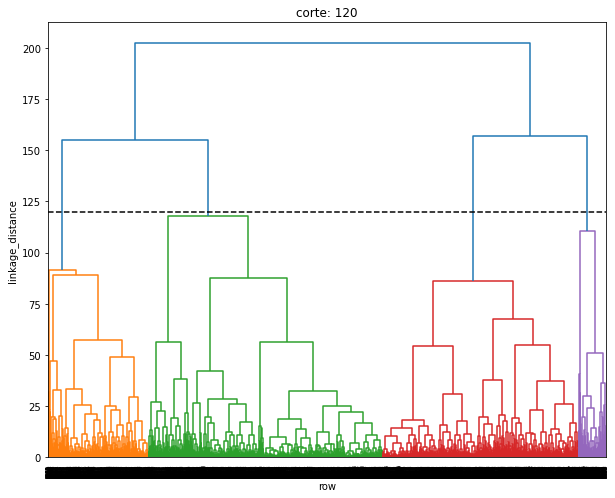

In [166]:
fig,ax=plt.subplots(figsize=(10,8))

plot_dendrogram(model=pipe_jer['jerarquico'],ax=ax,color_threshold=corte_altura)

ax.axhline(y=corte_altura,c='black',linestyle='--',label='altura del corte')
ax.set_title('dendograma')
ax.set_xlabel('row')
ax.set_ylabel('linkage_distance');
#ax.set_ylim(0,20);
ax.set_title('corte: {}'.format(corte_altura));

In [173]:
pipe_jer_2 = Pipeline(
    [ 
        ('standard_scaler',   pipe_jer['standard_scaler']), 
        ('pca',               pipe_jer['pca'])
    ]
)

In [174]:
clus = df_jer.pop('cluster')

In [175]:
df_transformed = pd.DataFrame(pipe_clustering_2.transform(df_jer), 
             columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

df_jer['cluster'] = clus

df_transformed['cluster'] = df_jer.reset_index().cluster

In [176]:
df_transformed

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.523976 -1.362828  0.427309  0.650976  0.144631  0.121368 -0.932455   
1    -1.625255  3.204914  0.681991 -0.018464  1.223587 -0.802781  0.913105   
2     1.053594  0.158431 -0.363152  1.873358 -1.807249 -0.964967  1.539053   
3    -1.509179 -0.824620  0.059495  1.137661 -0.226822 -0.004028 -0.779669   
4     0.335180 -0.479988 -1.553041  0.560382  1.130919  0.677488 -0.538141   
...        ...       ...       ...       ...       ...       ...       ...   
8631 -2.430407  5.038019  0.096553 -0.543916  0.510246  0.685353  2.205927   
8632 -1.713144  2.412626 -1.168781  2.121971  0.608689  0.106680  0.822937   
8633 -2.221945  4.425396 -0.932341  0.595894  0.927270 -0.432511  0.952621   
8634 -2.634141  8.306488 -0.842761 -0.743902  1.207127 -1.173815  1.454230   
8635 -1.610411  5.620713 -1.290038 -3.331605 -0.714638  1.665534  2.736225   

           PC8  cluster  
0     0.144223        0  
1    -0.521255        3  
2    -0.259708        2  
3     0.084378        0  
4    -0.212123        2  
...        ...      ...  
8631 -2.175278        0  
8632 -0.888311        3  
8633 -0.431767        3  
8634 -0.781280        3  
8635 -2.832372        0  

[8636 rows x 9 columns]

Text(0.5, 1.0, 'Cuarto cluster')

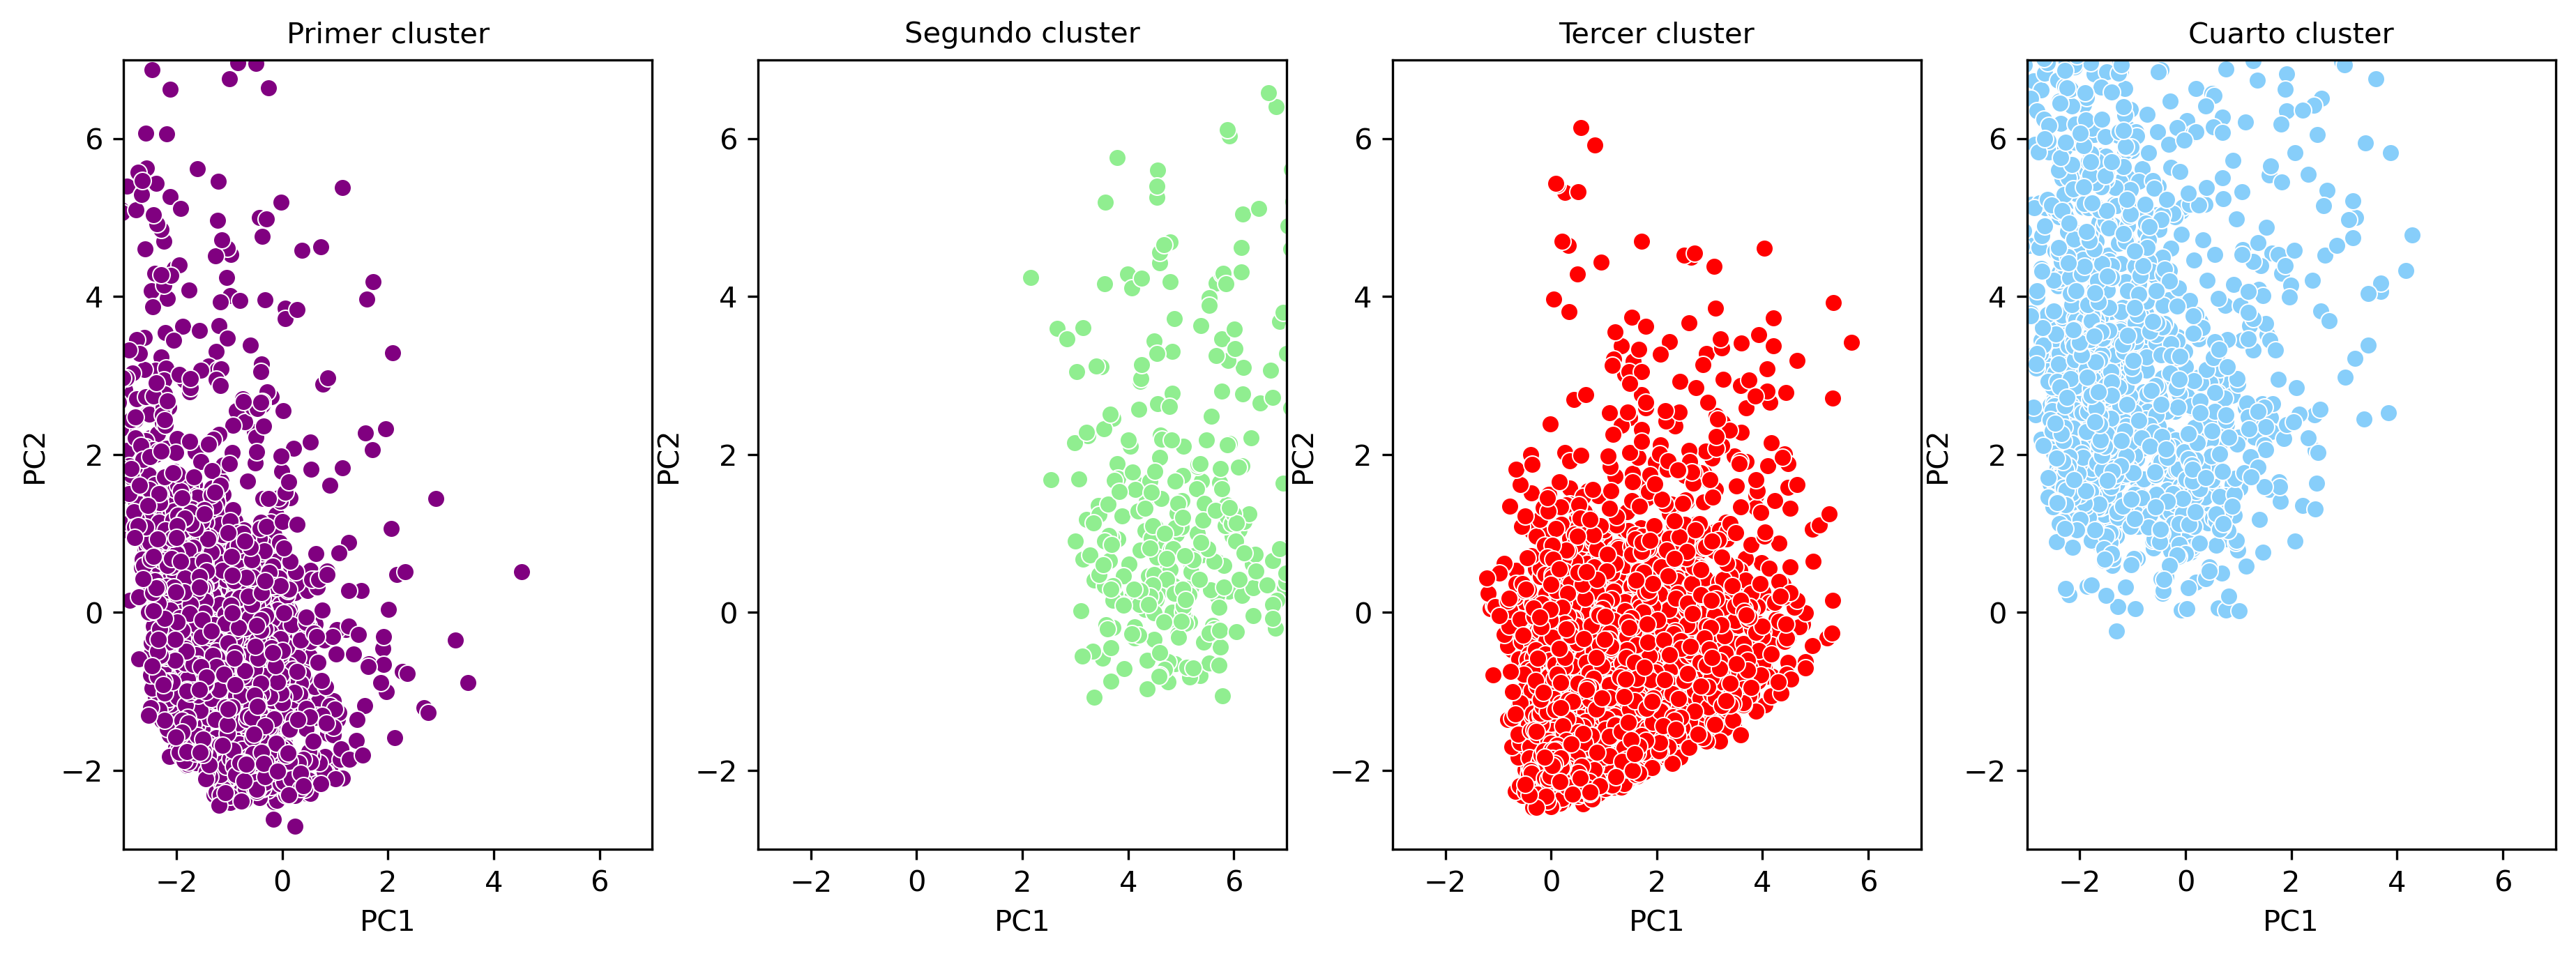

In [177]:
fig,ax = plt.subplots(figsize=(15,5), ncols=4, dpi=300)

sns.scatterplot(data=df_transformed[df_transformed.cluster == 0],x='PC1',y='PC2',ax=ax[0], color="purple")
sns.scatterplot(data=df_transformed[df_transformed.cluster == 1],x='PC1',y='PC2',ax=ax[1], color="lightgreen")
sns.scatterplot(data=df_transformed[df_transformed.cluster == 2],x='PC1',y='PC2',ax=ax[2], color="red")
sns.scatterplot(data=df_transformed[df_transformed.cluster == 3],x='PC1',y='PC2',ax=ax[3], color="lightskyblue")

ax[0].set_xlim([-3,7])
ax[0].set_ylim([-3,7])

ax[1].set_xlim([-3,7])
ax[1].set_ylim([-3,7])

ax[2].set_xlim([-3,7])
ax[2].set_ylim([-3,7])

ax[3].set_xlim([-3,7])
ax[3].set_ylim([-3,7])


ax[0].set_title('Primer cluster', size=10)
ax[1].set_title('Segundo cluster', size=10)
ax[2].set_title('Tercer cluster', size=10)
ax[3].set_title('Cuarto cluster', size=10)

Nota: hemos decidido escoger cinco grupos porque si subimos la altura, reducimos a cuatro. Viendo el dendograma sería la altura perfecta para cortar, pero los grupos quedan poco balanceados. 

## RADAR CHART

In [360]:
means_purchases_frecuency_limit = df_clusters.groupby('cluster').mean()['PURCHASES_FREQUENCY'].values
means_balance_frecuency_limit = df_clusters.groupby('cluster').mean()['BALANCE_FREQUENCY'].values
means_unique_pruchase_frecuency_limit = df_clusters.groupby('cluster').mean()['ONEOFF_PURCHASES_FREQUENCY'].values
means_purchases_installments_limit = df_clusters.groupby('cluster').mean()['PURCHASES_INSTALLMENTS_FREQUENCY'].values
means_cash_adv_limit = df_clusters.groupby('cluster').mean()['CASH_ADVANCE_FREQUENCY'].values

In [361]:
df_radar_chart = pd.DataFrame(
                    {'cluster': cluster_names,
                     'purchases_frecuency': means_purchases_frecuency_limit,
                     'balance_frecuency': means_balance_frecuency_limit,
                     'unique_pruchase': means_unique_pruchase_frecuency_limit,
                     'purchases_installments_freq': means_purchases_installments_limit,
                     'cash_adv_freq': means_cash_adv_limit
                    })

In [362]:
df_radar_chart

cluster  purchases_frecuency  balance_frecuency  unique_pruchase  \
0       0             0.945247           0.977679         0.681029   
1       1             0.556312           0.841441         0.152768   
2       2             0.170611           0.940687         0.084821   
3       3             0.452271           0.993695         0.246687   

   purchases_installments_freq  cash_adv_freq  
0                     0.728528       0.059451  
1                     0.422003       0.033380  
2                     0.093552       0.332762  
3                     0.347853       0.346737

In [363]:
df_radar_chart.to_csv('../../Trabajo 3 Info/df_radar_chart.csv')

In [364]:
import plotly.graph_objects as go

categories = ['Purchases Frecuency','Balance Frecuency','Unique Pruchase Frecuency',
              'Purchases Installments Frequency', 'Cash Advance Frequency']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.945247, 0.977679, 0.681029, 0.728528, 0.059451], #0.945247 0.977679 0.681029 0.728528 0.059451
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=[0.556312, 0.841441, 0.152768, 0.422003, 0.033380], #0.556312 0.841441 0.152768 0.422003 0.033380
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=[0.170611, 0.940687, 0.084821, 0.093552, 0.332762], #0.170611 0.940687 0.084821 0.093552 0.332762
      theta=categories,
      fill='toself',
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=[0.452271, 0.993695, 0.246687, 0.347853, 0.346737], #0.452271 0.993695 0.246687 0.347853 0.346737
      theta=categories,
      fill='toself',
      name='Cluster 3'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.update_layout(width = 900, height = 600, title = "Radar Chart por Cluster", 
                  title_x=0.5, bargap = 0.2)

fig.show()

Escalamos las variables de nuevo, ya que tenemos el nuevo df con la asignacion de clusters, pero las varaibles que vamos a representar a continuación no están escaladas:

In [365]:
df_a_escalar = df_clusters.loc[:, df_clusters.columns != 'cluster']
df_ = df_clusters.loc[:, df_clusters.columns == 'cluster']

In [366]:
df_

cluster
CUST_ID         
C10001         1
C10002         2
C10003         1
C10005         1
C10006         1
...          ...
C18530         3
C18637         3
C18666         3
C18942         3
C19182         3

[8636 rows x 1 columns]

In [367]:
scaler=StandardScaler()

In [368]:
scaler.fit(df_a_escalar)
array_scaled=scaler.transform(df_a_escalar)

In [369]:
df_scaled=pd.DataFrame(array_scaled,columns=df_a_escalar.columns,index=df_a_escalar.index)

In [370]:
df_s = df_scaled.join(df_)
df_s

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                             
C10001  -0.744625          -0.370047  -0.429184         -0.359160   
C10002   0.764152           0.067679  -0.473208         -0.359160   
C10003   0.426602           0.505405  -0.116413          0.099909   
C10005  -0.373910           0.505405  -0.465825         -0.349660   
C10006   0.099551           0.505405   0.142062         -0.359160   
...           ...                ...        ...               ...   
C18530   2.103457          -0.564592  -0.473208         -0.359160   
C18637   2.067998           0.505405  -0.473208         -0.359160   
C18666   1.853117           0.505405  -0.473208         -0.359160   
C18942   2.720870           0.505405  -0.473208         -0.359160   
C19182   2.083682          -0.297095  -0.374200         -0.359160   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                -0.354826     -0.468655            -0.820769   
C10002                -0.458839      2.568556            -1.236139   
C10003                -0.458839     -0.468655             1.256077   
C10005                -0.458839     -0.468655            -1.028455   
C10006                 0.994815     -0.468655             0.425339   
...                         ...           ...                  ...   
C18530                -0.458839      3.446081            -1.236139   
C18637                -0.458839     -0.325973            -1.236139   
C18666                -0.458839      2.355316            -1.236139   
C18942                -0.458839      4.604897            -1.236139   
C19182                -0.224919      3.564374             0.840707   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                    -0.686280                         -0.717179   
C10002                    -0.686280                         -0.926522   
C10003                     2.646651                         -0.926522   
C10005                    -0.408536                         -0.926522   
C10006                    -0.686280                          0.538882   
...                             ...                               ...   
C18530                    -0.686280                         -0.926522   
C18637                    -0.686280                         -0.926522   
C18666                    -0.686280                         -0.926522   
C18942                    -0.686280                         -0.926522   
C19182                    -0.686280                          0.748227   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                -0.681953         -0.479437      -0.517623   
C10002                 0.557022          0.099258      -0.597054   
C10003                -0.681953         -0.479437      -0.120467   
C10005                -0.681953         -0.479437      -0.557339   
C10006                -0.681953         -0.479437      -0.279329   
...                         ...               ...            ...   
C18530                 0.970012          0.822627      -0.597054   
C18637                 0.557022          0.243932      -0.597054   
C18666                 0.557022          1.545995      -0.597054   
C18942                 3.034972          2.269364      -0.597054   
C19182                 2.621982          1.401321      -0.398476   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
CUST_ID                                                                         
C10001      -0.962575 -0.543942         -0.305508         -0.537727  0.355181   
C10002       0.677204  0.796852          0.087689          0.212380  0.355181   
C10003       0.813852 -0.399503         -0

In [371]:
df_clusters

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10005    817.714335           1.000000      16.00             16.00   
C10006   1809.828751           1.000000    1333.28              0.00   
...              ...                ...        ...               ...   
C18530   6008.914524           0.777778       0.00              0.00   
C18637   5934.610587           1.000000       0.00              0.00   
C18666   5484.339435           1.000000       0.00              0.00   
C18942   7302.672686           1.000000       0.00              0.00   
C19182   5967.475270           0.833333     214.55              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10005                     0.00      0.000000             0.083333   
C10006                  1333.28      0.000000             0.666667   
...                         ...           ...                  ...   
C18530                     0.00   8304.470149             0.000000   
C18637                     0.00    302.678437             0.000000   
C18666                     0.00   5990.590134             0.000000   
C18942                     0.00  10762.707760             0.000000   
C19182                   214.55   8555.409326             0.833333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10005                     0.083333                          0.000000   
C10006                     0.000000                          0.583333   
...                             ...                               ...   
C18530                     0.000000                          0.000000   
C18637                     0.000000                          0.000000   
C18666                     0.000000                          0.000000   
C18942                     0.000000                          0.000000   
C19182                     0.000000                          0.666667   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10005                 0.000000                 0              1   
C10006                 0.000000                 0              8   
...                         ...               ...            ...   
C18530                 0.333333                 9              0   
C18637                 0.250000                 5              0   
C18666                 0.250000                14              0   
C18942                 0.750000                19              0   
C19182                 0.666667                13              5   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742

In [372]:
fig = px.scatter_ternary(df_clusters, a="PURCHASES", b="CASH_ADVANCE", c="MINIMUM_PAYMENTS",
    color="cluster", size_max=10)
    #color_discrete_map = {"Balance freq.": "blue", "Purchases freq.": "green", "Unique Purchase frec.":"red"} )
fig.update_traces(marker=dict(size=8,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))   

fig.update_layout(width = 900, height = 600, 
                  title_x=0.5, bargap = 0.2)
    
fig.show()

In [373]:
fig = px.scatter_ternary(df_s, a="CREDIT_LIMIT", b="BALANCE", c="MINIMUM_PAYMENTS",
    color="cluster", size_max=10)
    #color_discrete_map = {"Balance freq.": "blue", "Purchases freq.": "green", "Unique Purchase frec.":"red"} )
fig.update_traces(marker=dict(size=8,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))   

fig.update_layout(width = 900, height = 600, 
                  title_x=0.5, bargap = 0.2)
    
fig.show()